# Getting data

In [1]:
import pandas as pd
import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [ ]:
total_data = pd.read_csv('raw-data/BTCUSDT-1hour-from-2018-01-04.csv')
# total_data.set_index('Time', inplace=True)
total_data = total_data.iloc[::-1]

# Heikin Ashi

In [17]:
total_data['HA_Close'] = (total_data.Close + total_data.Open + total_data.High + total_data.Low) / 4

HA_Open = [total_data.Open.iloc[0]]
for i in range(1, len(total_data)):
    HA_Open.append((HA_Open[-1] + total_data.HA_Close.iloc[i-1]) / 2)
total_data['HA_Open'] = HA_Open

total_data['HA_High'] = total_data[['High', 'HA_Close', 'HA_Open']].max(axis=1)

total_data['HA_Low'] = total_data[['Low', 'HA_Close', 'HA_Open']].min(axis=1)

total_data['HA_CmO'] = total_data.HA_Close - total_data.HA_Open

# True Range

In [18]:
total_data['TR'] = total_data.High - total_data.Low

In [19]:
df = total_data.iloc[-1000:]

In [20]:
def random_period(df: pd.DataFrame, period: int):
    r = random.choice(range(0,len(df)-period))
    sliced_df = df[df.index[r+period] : df.index[r]]
    return sliced_df

In [21]:
df = random_period(total_data, 10000)
df

,Time,Open,Close,High,Low,Volume,Transaction,HA_Close,HA_Open,HA_High,HA_Low,HA_CmO,TR
28229,2019-01-22 18:00:00,3580.881554,3587.157443,3587.716887,3568.896861,1.163032,4.164730e+03,3581.163186,3571.636262,3587.716887,3568.896861,9.526924,18.820026
28228,2019-01-22 19:00:00,3587.157443,3581.081173,3602.428923,3573.933310,2.378231,8.532578e+03,3586.150212,3576.399724,3602.428923,3573.933310,9.750488,28.495613
28227,2019-01-22 20:00:00,3575.518013,3585.624064,3592.718772,3575.518013,3.780984,1.355417e+04,3582.344716,3581.274968,3592.718772,3575.518013,1.069747,17.200759
28226,2019-01-22 21:00:00,3585.631199,3568.896861,3585.849523,3568.896861,0.744251,2.658046e+03,3577.318611,3581.809842,3585.849523,3568.896861,-4.491231,16.952662
28225,2019-01-22 22:00:00,3567.896845,3573.150251,3577.217582,3563.380012,0.538461,1.922515e+03,3570.411172,3579.564226,3579.564226,3563.380012,-9.153054,13.837570
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,2020-03-14 05:00:00,5504.600000,5428.200000,5539.100000,5416.200000,137.904373,7.532125e+05,5472.025000,5526.767834,5539.100000,5416.200000,-54.742834,122.900000
18233,2020-03-14 06:00:00,5429.900000,5427.000000,5474.700000,5391.800000,126.636124,6.876435e+05,5430.850000,5499.396417,5499.396417,5391.800000,-68.546417,82.900000
18232,2020-03-14 07:00:00,5427.000000,5499.000000,5508.500000,5402.000000,115.309911,6.276894e+05,5459.125000,5465.123208,5508.500000,5402.000000,-5.998208,106.500000
18231,2020-03-14 08:00:00,5499.300000,5351.500000,5502.700000,5265.000000,231.954193,1.241020e+06,5404.625000,5462.124104,5502.700000,5265.000000,-57.499104,237.700000


In [8]:
df['V/T'] = df.Volume/df.Transaction
df['LT'] = df['V/T'] * df.Close
df['diff_Close'] = df.Close.diff()
df['diff_V/T'] = df['V/T'].diff()
df['diff2_Close'] = df.diff_Close.diff()
df['diff2_V/T'] = df['diff_V/T'].diff()
df['diff_LT'] = df.LT.diff()
df['diff2_LT'] = df.diff_LT.diff()

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [9]:
df

,Time,Open,Close,High,Low,Volume,Transaction,HA_Close,HA_Open,HA_High,...,HA_CmO,TR,V/T,LT,diff_Close,diff_V/T,diff2_Close,diff2_V/T,diff_LT,diff2_LT
108841,2022-01-27 09:58:00,36530.0,36506.8,36554.4,36500.9,3.357216,122639.767777,36523.025,36542.624980,36554.400000,...,-19.599980,53.5,0.000027,0.999359,NaN,NaN,NaN,NaN,NaN,NaN
108840,2022-01-27 09:59:00,36509.5,36534.0,36537.5,36509.5,5.537054,202247.875564,36522.625,36532.824990,36537.500000,...,-10.199990,28.0,0.000027,1.000212,27.2,2.953700e-09,NaN,NaN,0.000852,NaN
108839,2022-01-27 10:00:00,36534.0,36520.9,36534.0,36508.0,3.213613,117376.139217,36524.225,36527.724995,36534.000000,...,-3.499995,26.0,0.000027,0.999897,-13.1,1.192141e-09,-40.3,-1.761559e-09,-0.000315,-0.001168
108838,2022-01-27 10:01:00,36520.9,36502.7,36530.1,36502.7,4.618668,168641.784615,36514.100,36525.974998,36530.100000,...,-11.874998,27.4,0.000027,0.999716,-18.2,8.694118e-09,-5.1,7.501976e-09,-0.000181,0.000134
108837,2022-01-27 10:02:00,36502.8,36521.1,36521.1,36494.3,2.224973,81215.807181,36509.825,36520.037499,36521.100000,...,-10.212499,26.8,0.000027,1.000525,18.4,8.358962e-09,36.6,-3.351552e-10,0.000809,0.000990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98846,2022-02-03 08:33:00,37093.6,37087.4,37097.1,37087.4,1.635271,60654.329633,37091.375,37075.568085,37097.100000,...,15.806915,9.7,0.000027,0.999895,-6.3,-4.451184e-09,-19.7,3.951557e-09,-0.000335,-0.000385
98845,2022-02-03 08:34:00,37087.5,37052.0,37087.5,37041.1,4.628763,171521.312251,37067.025,37083.471543,37087.500000,...,-16.446543,46.4,0.000027,0.999904,-35.4,2.601898e-08,-29.1,3.047016e-08,0.000010,0.000345
98844,2022-02-03 08:35:00,37051.9,37056.3,37068.6,37038.6,6.363653,235773.255683,37053.850,37075.248271,37075.248271,...,-21.398271,30.0,0.000027,1.000170,4.3,4.044457e-09,39.7,-2.197452e-08,0.000266,0.000256
98843,2022-02-03 08:36:00,37056.3,37061.0,37067.6,37056.3,1.494754,55397.706157,37060.300,37064.549136,37067.600000,...,-4.249136,11.3,0.000027,0.999989,4.7,-8.325257e-09,0.4,-1.236971e-08,-0.000182,-0.000448


# Indicator generating

In [10]:
import talib

#### SMA

In [112]:
# SMA_period = [2, 3, 5, 10, 20, 50, 100, 200, 300, 400, 500, 1000]
SMA_period = [p for p in range(2,501)]
if not f'SMA{SMA_period}' in df.columns:
    for period in SMA_period:
        df[f'SMA{period}'] = talib.SMA(df.Close, timeperiod= period)

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


## df2

In [11]:
df2 = pd.DataFrame()

In [12]:
average = (df.High + df.Low)/2
SMA_df = pd.DataFrame()
SMA_period = [p for p in range(2,150)]

SMA_df[f'SMA_Average1'] = average
SMA_df[f'SMA_Close1'] = df.Close
SMA_df[f'SMA_High1'] = df.High
SMA_df[f'SMA_Low1'] = df.Low
if not f'SMA_Average{SMA_period}' in df.columns:
    for period in SMA_period:
        SMA_df[f'SMA_Average{period}'] = talib.SMA(average, timeperiod= period)
        
if not f'SMA_Close{SMA_period}' in df.columns:
    for period in SMA_period:
        SMA_df[f'SMA_Close{period}'] = talib.SMA(df.Close, timeperiod= period)

if not f'SMA_High{SMA_period}' in df.columns:
    for period in SMA_period:
        SMA_df[f'SMA_High{period}'] = talib.SMA(df.High, timeperiod= period)
        
if not f'SMA_Low{SMA_period}' in df.columns:
    for period in SMA_period:
        SMA_df[f'SMA_Low{period}'] = talib.SMA(df.Low, timeperiod= period)
        
SMA_average_arr = np.array(SMA_df[[f'SMA_Average{period}' for period in SMA_period]])
SMA_close_arr = np.array(SMA_df[[f'SMA_Close{period}' for period in SMA_period]])
SMA_high_arr = np.array(SMA_df[[f'SMA_High{period}' for period in SMA_period]])
SMA_low_arr = np.array(SMA_df[[f'SMA_Low{period}' for period in SMA_period]])

price_arr = np.array(average)
al_average_arr = np.array([np.divide((np.array(price_arr[i,] >= SMA_average_arr[i,:])[(price_arr[i,] >= SMA_average_arr[i,:])[:] == True]).shape[0], SMA_average_arr.shape[1]) for i in range(price_arr.shape[0])])
price_arr = np.array(df.Close)
al_close_arr = np.array([np.divide((np.array(price_arr[i,] >= SMA_close_arr[i,:])[(price_arr[i,] >= SMA_close_arr[i,:])[:] == True]).shape[0], SMA_close_arr.shape[1]) for i in range(price_arr.shape[0])])
price_arr = np.array(df.High)
al_high_arr = np.array([np.divide((np.array(price_arr[i,] >= SMA_high_arr[i,:])[(price_arr[i,] >= SMA_high_arr[i,:])[:] == True]).shape[0], SMA_high_arr.shape[1]) for i in range(price_arr.shape[0])])
price_arr = np.array(df.Low)
al_low_arr = np.array([np.divide((np.array(price_arr[i,] >= SMA_low_arr[i,:])[(price_arr[i,] >= SMA_low_arr[i,:])[:] == True]).shape[0], SMA_low_arr.shape[1]) for i in range(price_arr.shape[0])])

df2['Average'] = al_average_arr
df2['Open'] = al_close_arr
df2.Open = df2.Open.shift()
df2['Close'] = al_close_arr
df2['High'] = al_high_arr
df2['Low'] = al_low_arr

df2['diff_Close'] = df2.Close.diff() 

#Heikin ashi

df2['HA_Close'] = (df2.Close + df2.Open + df2.High + df2.Low) / 4

HA_Open = [df2.Open.iloc[0], df2.Open.iloc[1]]
for i in range(2, len(df2)):
    HA_Open.append((HA_Open[-1] + df2.HA_Close.iloc[i-1]) / 2)
df2['HA_Open'] = HA_Open

df2['HA_High'] = df2[['High', 'HA_Close', 'HA_Open']].max(axis=1)

df2['HA_Low'] = df2[['Low', 'HA_Close', 'HA_Open']].min(axis=1)

df2['HA_CmO'] = df2.HA_Close - df2.HA_Open

# above_green_arr = np.array([np.divide(np.array(price_arr[i,] >= SMAA_arr[1 == SMAA_arr[:,i,1]][:,i,0])[(price_arr[i,] >= SMAA_arr[1 == SMAA_arr[:,i,1]][:,i,0])[:] == True].shape[0] , np.array(price_arr[i,] >= SMAA_arr[1 == SMAA_arr[:,i,1]][:,i,0]).shape[0]) for i in range(price_arr.shape[0])])
# below_red_arr = np.array([np.divide(np.array(price_arr[i,] < SMAA_arr[0 == SMAA_arr[:,i,1]][:,i,0])[(price_arr[i,] < SMAA_arr[0 == SMAA_arr[:,i,1]][:,i,0])[:] == True].shape[0] , np.array(price_arr[i,] < SMAA_arr[0 == SMAA_arr[:,i,1]][:,i,0]).shape[0]) for i in range(price_arr.shape[0])])
# df['above_green'] = above_green_arr
# df['below_red'] = below_red_arr
# df.above_green.fillna(0, inplace=True)
# df.below_red.fillna(0, inplace=True)
# df['diff_above_green'] = df.above_green.diff()
# df['diff_below_red'] = df.below_red.diff()

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  from ipykernel import kernelapp as app
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

#### SMAA

In [98]:
average = (df.High + df.Low)/2
SMAA_period = [p for p in range(2,200)]
if not f'SMAA{SMAA_period}' in df.columns:
    for period in SMAA_period:
        df[f'SMAA{period}'] = talib.SMA(average, timeperiod= period)


C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


#### EMA

In [99]:
# EMA_period = [2, 3, 5, 10, 20, 50, 100, 200, 300, 400, 500, 1000]
EMA_period = [p for p in range(2,200)]
if not f'EMA{EMA_period}' in df.columns:
    for period in EMA_period:
        df[f'EMA{period}'] = talib.EMA(df.Close, timeperiod= period)

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### ATR

In [247]:
# AT = df.High - df.Low
ATR_period = [p for p in range(1,100)]
if not f'ATR{ATR_period}' in df.columns:
    for period in ATR_period:
        df[f'ATR{period}'] = talib.ATR(high= df.High, low= df.Low, close= df.Close, timeperiod= period)

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### MACD

In [248]:
MACD_fastperiod = 12
MACD_slowperiod = 26
MACD_signalperiod = 9
if not (f'MACDline{MACD_fastperiod}-{MACD_slowperiod}' and f'MACDsignal{MACD_fastperiod}-{MACD_slowperiod}-{MACD_signalperiod}') in df.columns:
    df[f'MACDline{MACD_fastperiod}-{MACD_slowperiod}'], df[f'MACDsignal{MACD_signalperiod}'] = talib.MACD(df.Close, MACD_fastperiod, MACD_slowperiod, MACD_signalperiod)[0:2]

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### RSI

In [249]:
# RSI_period = [2,3,5,7,10,15, 20, 25, 30, 40, 50, 100, 150, 200, 250, 300]
RSI_period = [2,3,5,7,10,15, 20, 25, 30, 40, 50, 100]
if not f'RSI{RSI_period}' in df.columns:
    for period in RSI_period:
        df[f'RSI{period}'] = talib.RSI(df.Close, timeperiod= period)
        df2[f'RSI{period}'] = talib.RSI(df2.Close, timeperiod= period)

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### BBANDS

In [250]:
BBANDS_period = [5, 10, 20]
if not f'BBANDS{BBANDS_period}' in df.columns:
    for period in BBANDS_period:
        df[f'BBANDS_upper{period}'], df[f'BBANDS_middle{period}'], df[f'BBANDS_lower{period}'] = talib.BBANDS(df.Close, timeperiod= period)

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### STOCH

In [251]:
df['STOCH_k'], df['STOCH_d'] = talib.STOCH(high=df.High, low=df.Low, close=df.Close)

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Candle patterns generating

In [429]:
talib.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [10]:
talib.get_function_groups()['Pattern Recognition']

['CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CDLPIERCING',
 'CDLRICKSHAWMAN',
 'CDLRISEFALL3METHODS',
 'CDLSEPARATINGLINES',
 'CDLSHOOTINGSTAR',
 'CDLSHORTLINE',
 'CDLSPINNINGTOP',
 'CDLSTALLEDPATTERN',
 

In [14]:
for pattern in talib.get_function_groups()['Pattern Recognition']:
    if not pattern in df.columns:
        exec(f'df["{pattern}"] = talib.{pattern}(df.Open, df.High, df.Low, df.Close)/100')

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Stop-Loss

## Chandelier exit

In [13]:
def chandelier_exit (df: pd.DataFrame, timeperiod: int, multiply: float):
    max_high = df.HA_High.rolling(window= timeperiod, min_periods= 1).max()
    min_low = df.HA_Low.rolling(window= timeperiod, min_periods= 1).min()

    if not f'ATR{timeperiod}' in df.columns:
        df[f'ATR{timeperiod}'] = talib.ATR(high= df.HA_High, low= df.HA_Low, close= df.HA_Close, timeperiod= timeperiod)
    atr = df[f'ATR{timeperiod}']
    atr_multiplied = atr*multiply
    
    chandelier_exit_long = max_high - atr_multiplied
    chandelier_exit_short = min_low + atr_multiplied
    
    price = df.HA_Close

    for i in range(1, len(price)):
        if price.iloc[i-1] > chandelier_exit_long.iloc[i-1]:
            chandelier_exit_long.iloc[i] = max(chandelier_exit_long.iloc[i], chandelier_exit_long.iloc[i-1])
        if price.iloc[i-1] < chandelier_exit_short.iloc[i-1]:
            chandelier_exit_short.iloc[i] = min(chandelier_exit_short.iloc[i], chandelier_exit_short.iloc[i-1])
            
    direction = [1]
    for i in range(len(price)):
        if price.iloc[i] > chandelier_exit_short.iloc[i-1]:
            direction.append(1)
        elif price.iloc[i] < chandelier_exit_long.iloc[i-1]:
            direction.append(-1)
        else:
            direction.append(direction[-1])
    del direction[0]
    
    chandelier_exit = []
    for i in range(len(direction)):
        if direction[i] == 1:
            chandelier_exit.append(chandelier_exit_long.iloc[i])
        else:
            chandelier_exit.append(chandelier_exit_short.iloc[i])
            
    signal = [0]
    for i in range(1, len(direction)):
        if direction[i] == 1 and direction[i-1] == -1:
            signal.append(1)
        elif direction[i] == -1 and direction[i-1] == 1:
            signal.append(-1)
        else:
            signal.append(0)
    
    return chandelier_exit, signal

In [ ]:
df['CE'], df['CE_signal'] = chandelier_exit(df= df, timeperiod= 1, multiply= 0.9)


In [50]:
df

,Time,Open,Close,High,Low,Volume,Transaction,HA_Close,HA_Open,HA_High,HA_Low,HA_CmO,TR,V/T,diff_Close,diff_V/T,diff2_Close,diff2_V/T,ATR1
26662,2019-03-29 01:00:00,4032.2,4025.0,4036.4,4022.7,3.703580,1.492511e+04,4029.075,4030.078581,4036.400000,4022.700000,-1.003581,13.7,0.000248,-7.2,2.893621e-07,-11.6,8.460954e-07,NaN
26661,2019-03-29 02:00:00,4027.1,4034.1,4039.8,4027.1,8.393158,3.386908e+04,4032.025,4029.576791,4039.800000,4027.100000,2.448209,12.7,0.000248,9.1,-3.325036e-07,16.3,-6.218657e-07,12.700000
26660,2019-03-29 03:00:00,4035.2,4037.4,4042.4,4027.7,25.153360,1.014720e+05,4035.675,4030.800895,4042.400000,4027.700000,4.874105,14.7,0.000248,3.3,7.302033e-08,-5.8,4.055239e-07,14.700000
26659,2019-03-29 04:00:00,4038.8,4039.5,4061.5,4032.6,24.796976,1.002562e+05,4043.100,4033.237948,4061.500000,4032.600000,9.862052,28.9,0.000247,2.1,-5.487064e-07,-1.2,-6.217268e-07,28.900000
26658,2019-03-29 05:00:00,4035.7,4028.8,4037.2,4028.1,7.857961,3.168526e+04,4032.450,4038.168974,4038.168974,4028.100000,-5.718974,9.1,0.000248,-10.7,6.644186e-07,-12.8,1.213125e-06,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,2021-07-09 02:00:00,32686.6,32965.9,33013.9,32605.1,158.330052,5.198351e+06,32817.875,32595.678693,33013.900000,32595.678693,222.196307,408.8,0.000030,292.6,-3.356946e-07,7.4,-4.315946e-07,500.800000
6668,2021-07-09 03:00:00,32958.5,32939.4,33098.0,32750.0,174.974630,5.768059e+06,32936.475,32706.776847,33098.000000,32706.776847,229.698153,348.0,0.000030,-26.5,-1.226498e-07,-319.1,2.130448e-07,391.223153
6667,2021-07-09 04:00:00,32940.2,33029.6,33140.9,32892.4,110.636542,3.653725e+06,33000.775,32821.625923,33140.900000,32821.625923,179.149077,248.5,0.000030,90.2,-5.462159e-08,116.7,6.802821e-08,319.274077
6666,2021-07-09 05:00:00,33029.6,32985.3,33304.2,32965.9,127.410752,4.220502e+06,33071.250,32911.200462,33304.200000,32911.200462,160.049538,338.3,0.000030,-44.3,-9.194322e-08,-134.5,-3.732163e-08,392.999538


# To array

In [14]:

from sklearn.preprocessing import MinMaxScaler

a = np.array(df)
for i in range(1, len(a)-1):
    if a[:,5][i] == 0:
        a[:,5][i] = (a[:,5][i-1] + a[:,5][i+1])/2
    if a[:,6][i] == 0:
        a[:,6][i] = (a[:,6][i-1] + a[:,6][i+1])/2
        
a2 = np.array(df2)

# Machine learning

(499, 517)

# Correlation

In [258]:
for i in range(len(df2.columns)):
    print(f'{i}- {df2.columns[i]}')

0- Average
1- Open
2- Close
3- High
4- Low
5- HA_Close
6- HA_Open
7- HA_High
8- HA_Low
9- HA_CmO
10- RSI2
11- RSI3
12- RSI5
13- RSI7
14- RSI10
15- RSI15
16- RSI20
17- RSI25
18- RSI30
19- RSI40
20- RSI50
21- RSI100
22- diff_Close


In [260]:
for i in range(len(df.columns)):
    print(f'{i}- {df.columns[i]}')

0- Time
1- Open
2- Close
3- High
4- Low
5- Volume
6- Transaction
7- HA_Close
8- HA_Open
9- HA_High
10- HA_Low
11- HA_CmO
12- TR
13- V/T
14- diff_Close
15- diff_V/T
16- diff2_Close
17- diff2_V/T
18- SMAA2
19- SMAA3
20- SMAA4
21- SMAA5
22- SMAA6
23- SMAA7
24- SMAA8
25- SMAA9
26- SMAA10
27- SMAA11
28- SMAA12
29- SMAA13
30- SMAA14
31- SMAA15
32- SMAA16
33- SMAA17
34- SMAA18
35- SMAA19
36- SMAA20
37- SMAA21
38- SMAA22
39- SMAA23
40- SMAA24
41- SMAA25
42- SMAA26
43- SMAA27
44- SMAA28
45- SMAA29
46- SMAA30
47- SMAA31
48- SMAA32
49- SMAA33
50- SMAA34
51- SMAA35
52- SMAA36
53- SMAA37
54- SMAA38
55- SMAA39
56- SMAA40
57- SMAA41
58- SMAA42
59- SMAA43
60- SMAA44
61- SMAA45
62- SMAA46
63- SMAA47
64- SMAA48
65- SMAA49
66- SMAA50
67- SMAA51
68- SMAA52
69- SMAA53
70- SMAA54
71- SMAA55
72- SMAA56
73- SMAA57
74- SMAA58
75- SMAA59
76- SMAA60
77- SMAA61
78- SMAA62
79- SMAA63
80- SMAA64
81- SMAA65
82- SMAA66
83- SMAA67
84- SMAA68
85- SMAA69
86- SMAA70
87- SMAA71
88- SMAA72
89- SMAA73
90- SMAA74
91- SMAA75


In [418]:
color = []
for i in range(len(df2)):
    if df2.diff_Close.iloc[i] >= 0:
        color.append(1)
    else:
        color.append(0)
df2['color_Close'] = color


color = []
for i in range(len(df)):
    if df.diff_Close.iloc[i] >= 0:
        color.append(1)
    else:
        color.append(0)
df['color_Close'] = color

color = []
for i in range(len(df)):
    if df['diff_V/T'].iloc[i] >= 0:
        color.append(1)
    else:
        color.append(0)
df['color_V/T'] = color

df['diff_HA_Close'] = df.HA_Close.diff()
color = []
for i in range(len(df)):
    if df.diff_HA_Close.iloc[i] >= 0:
        color.append(1)
    else:
        color.append(0)
df['color_HA_Close'] = color

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [434]:
z = np.array(df.color_Close.shift().iloc[1000:])
x = np.array(df.RSI2.iloc[1000:])
np.corrcoef(z,x)

array([[1.        , 0.29970991],
       [0.29970991, 1.        ]])

In [411]:
# df.diff_Close.shift().corr(df.diff_Close, method='pearson')

z = np.array(df.dropna().Color.shift().iloc[1:])
x = np.array(df.dropna()['diff_V/T'].iloc[1:])
np.corrcoef(z,x)

array([[ 1.        , -0.23862178],
       [-0.23862178,  1.        ]])

In [361]:
a[:-1,2].shape
z

array([7570.999855, 7601.      , 7299.899117, ..., 4084.3     ,
       4090.      , 4077.8     ])

In [314]:
df.index = range(len(df))
df2.index = range(len(df2))

# Visualisation

In [20]:
def after_signal_chart (arr: np.array, target: int, fr: int, to: int, offset: int, condition: np.array, title: str):
    future = np.array([])
    c = 0

    for i in range(len(condition)):
        if condition[i]:
            c += 1
            j = i+fr
            future = np.append(future, arr[j:j+offset,target])
    future = future.reshape((c, offset))

    fig, ax = plt.subplots(figsize=(20,10))
    for n in range(future.shape[0]):
        ax.scatter(x= range(future.shape[1]), y= future[n,:], c='blue', s=100, alpha=0.1)

    for n in range(offset):
        xmin = (n-0.5)
        xmax = (n+0.5)
        y = np.mean(future[:,n])
        ax.hlines(y=y, xmin=xmin, xmax=xmax, ls='--')
    ax.axhline(y=0, c='red');
    ax.set(title=f'{title}')
    fig.show()
    

In [100]:
for i in range(len(df.columns)):
    print(f'{i}- {df.columns[i]}')

0- Time
1- Open
2- Close
3- High
4- Low
5- Volume
6- Transaction
7- HA_Close
8- HA_Open
9- HA_High
10- HA_Low
11- HA_CmO
12- TR
13- V/T
14- LT
15- diff_Close
16- diff_V/T
17- diff2_Close
18- diff2_V/T
19- diff_LT
20- diff2_LT
21- SMAA2
22- SMAA3
23- SMAA4
24- SMAA5
25- SMAA6
26- SMAA7
27- SMAA8
28- SMAA9
29- SMAA10
30- SMAA11
31- SMAA12
32- SMAA13
33- SMAA14
34- SMAA15
35- SMAA16
36- SMAA17
37- SMAA18
38- SMAA19
39- SMAA20
40- SMAA21
41- SMAA22
42- SMAA23
43- SMAA24
44- SMAA25
45- SMAA26
46- SMAA27
47- SMAA28
48- SMAA29
49- SMAA30
50- SMAA31
51- SMAA32
52- SMAA33
53- SMAA34
54- SMAA35
55- SMAA36
56- SMAA37
57- SMAA38
58- SMAA39
59- SMAA40
60- SMAA41
61- SMAA42
62- SMAA43
63- SMAA44
64- SMAA45
65- SMAA46
66- SMAA47
67- SMAA48
68- SMAA49
69- SMAA50
70- SMAA51
71- SMAA52
72- SMAA53
73- SMAA54
74- SMAA55
75- SMAA56
76- SMAA57
77- SMAA58
78- SMAA59
79- SMAA60
80- SMAA61
81- SMAA62
82- SMAA63
83- SMAA64
84- SMAA65
85- SMAA66
86- SMAA67
87- SMAA68
88- SMAA69
89- SMAA70
90- SMAA71
91- SMAA72
9

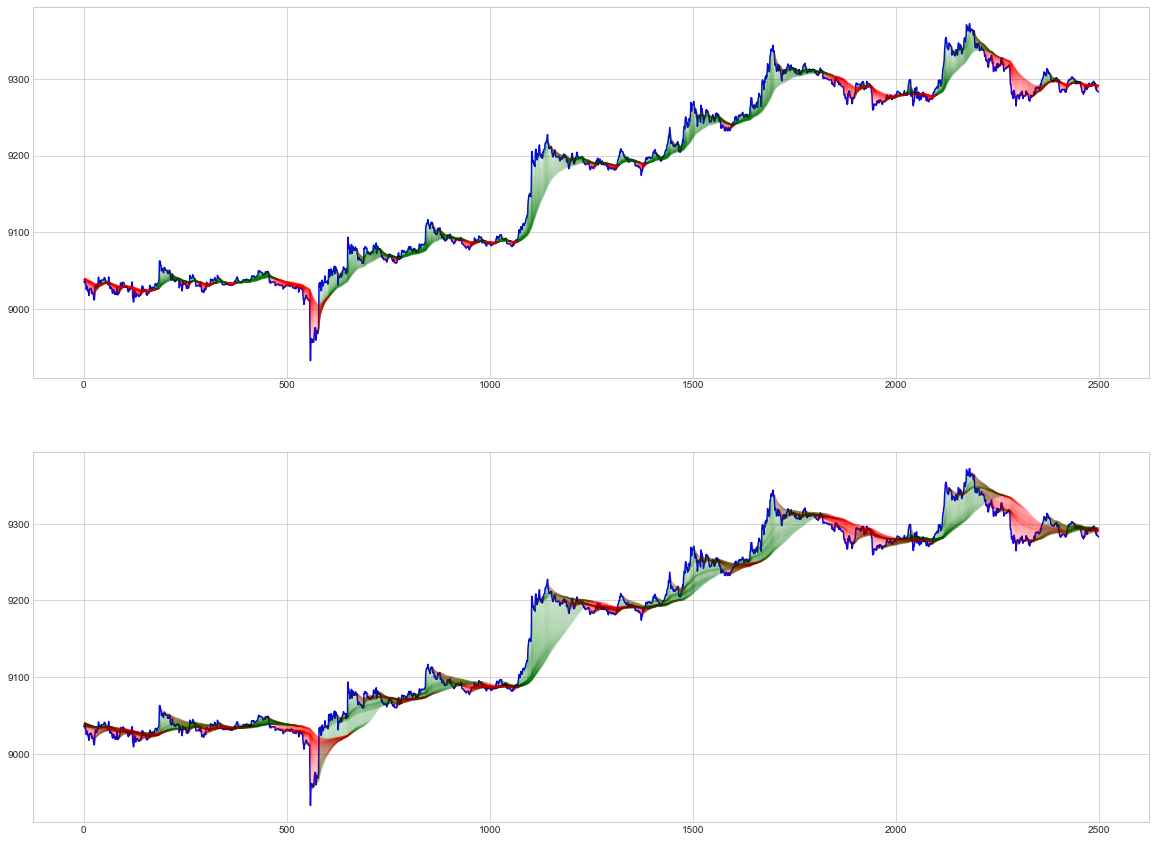

In [106]:
from matplotlib.collections import LineCollection

fr = 5500
to = 8000

fig, ax = plt.subplots(nrows=2,
                       ncols=1,
                       figsize=(20,15))
ax[0].plot(range(to-fr),a[fr:to,2], c='blue')
# ax[0].plot(range(to-fr),a[:,3][fr:to], c='purple')
# ax[0].plot(range(to-fr),a[:,4][fr:to], c='purple')

for i in range(219,320):
    x = np.arange(to-fr)
    y = a[fr:to,i]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[+1:]], axis=1)
    
    colors = []
    for j in range(fr+1,to):
        if a[j,i] >= a[j,i+1]:
            colors.append('green')
        else:
            colors.append('red')

    lc = LineCollection(segments, colors=colors, alpha=0.05)

    ax[0].add_collection(lc)
    ax[0].autoscale()
#     ax[0].margins(0.1)

ax[1].plot(range(to-fr),a[fr:to,2], c='blue')
# ax[0].plot(range(to-fr),a[:,3][fr:to], c='purple')
# ax[0].plot(range(to-fr),a[:,4][fr:to], c='purple')

for i in range(21,170):
    x = np.arange(to-fr)
    y = a[fr:to,i]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[+1:]], axis=1)
    
    colors = []
    for j in range(fr+1,to):
        if a[j,i] >= a[j,i+1]:
            colors.append('green')
        else:
            colors.append('red')

    lc = LineCollection(segments, colors=colors, alpha=0.05)

    ax[1].add_collection(lc)
    ax[1].autoscale()

#     points = []
#     for i in range(1,(to-fr)):
#         if a[fr+i-1,11] < a[fr+i-2,11] and a[fr+i-1,11] > 0 and a[fr+i-2,11] > 0:
#             if a[fr+i,7] < a[fr+i,8] and a[fr+i-1,7] > a[fr+i-1,8]:
#                 points.append([i, a[fr+i,2], 'o-r'])
#         elif a[fr+i-1,11] > a[fr+i-2,11] and a[fr+i-1,11] < 0 and a[fr+i-2,11] < 0:
#             if a[fr+i,7] > a[fr+i,8] and a[fr+i-1,7] < a[fr+i-1,8]:
#                 points.append([i, a[fr+i,2], 'o-g'])
#     for point in points:
#         ax[0].plot(point[0], point[1], point[2], ms=10, alpha=0.5)
        
        
#     points = []
#     for i in range(1,(to-fr)):
#         if a[fr+i,11] < a[fr+i-1,11] and a[fr+i,11] > 0 and a[fr+i-1,11] > 0:
#             points.append([i, a[fr+i,2], 'o-r'])
#         elif a[fr+i,11] > a[fr+i-1,11] and a[fr+i,11] < 0 and a[fr+i-1,11] < 0:
#             points.append([i, a[fr+i,2], 'o-g'])
#     for point in points:
#         ax[0].plot(point[0], point[1], point[2], ms=10, alpha=0.5)
        
        
#     points = []
#     for i in range(1,(to-fr)):
#         if a[fr+i,19] > a[fr+i,7] and a[fr+i-1,19] < a[fr+i-1,7]:
#             points.append([i, a[fr+i,2], '^-r'])
#         elif a[fr+i,19] < a[fr+i,7] and a[fr+i-1,19] > a[fr+i-1,7]:
#             points.append([i, a[fr+i,2], '^-g'])
#     for point in points:
#         ax[0].plot(point[0], point[1], point[2], ms=10, alpha=0.5) 
        
plt.show()

In [96]:
df['CE'], df['CE_signal'] = chandelier_exit(df= df, timeperiod= 1, multiply= .8)

df2['CE'], df2['CE_signal'] = chandelier_exit(df= df2, timeperiod= 1, multiply= 1.85)

from sklearn.preprocessing import MinMaxScaler

a = np.array(df)
for i in range(1, len(a)-1):
    if a[:,5][i] == 0:
        a[:,5][i] = (a[:,5][i-1] + a[:,5][i+1])/2
    if a[:,6][i] == 0:
        a[:,6][i] = (a[:,6][i-1] + a[:,6][i+1])/2
        
a2 = np.array(df2)

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
for i in range(len(df2.columns)):
    print(f'{i}- {df2.columns[i]}')

0- Average
1- Open
2- Close
3- High
4- Low
5- diff_Close
6- HA_Close
7- HA_Open
8- HA_High
9- HA_Low
10- HA_CmO


In [86]:
for i in range(len(df.columns)):
    print(f'{i}- {df.columns[i]}')

0- Time
1- Open
2- Close
3- High
4- Low
5- Volume
6- Transaction
7- HA_Close
8- HA_Open
9- HA_High
10- HA_Low
11- HA_CmO
12- TR
13- V/T
14- LT
15- diff_Close
16- diff_V/T
17- diff2_Close
18- diff2_V/T
19- diff_LT
20- diff2_LT


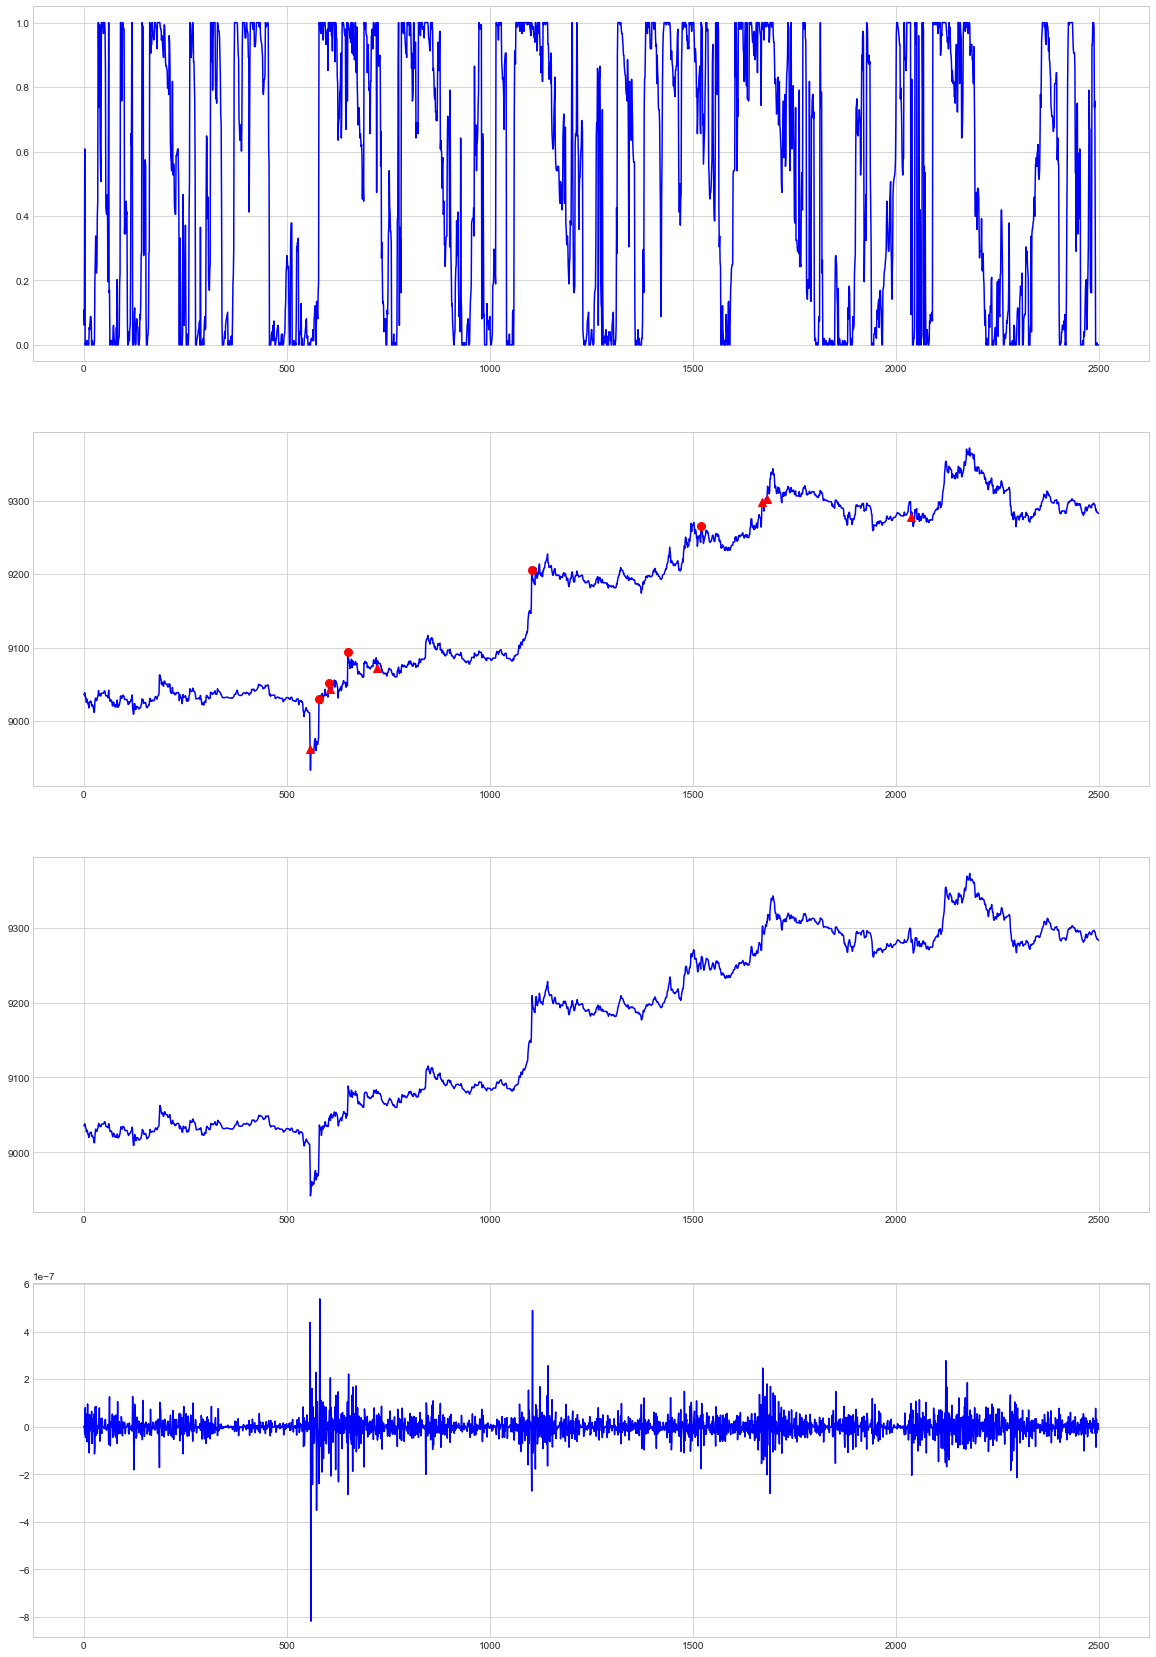

In [107]:
for n in range(1):
#     fr = n*100 + 100
#     to = (n+1)*100 + 100

    fr = 5500
    to = 8000
    
    fig, ax = plt.subplots(nrows=4,
                           ncols=1,
                           figsize=(20,30))
#     ax[0].plot(a2[fr:to,3], c='green')
#     ax[0].plot(a2[fr:to,4], c='red')
    ax[0].plot(a2[fr:to,2], c='blue')
#     ax[0].plot(a[fr:to,14], c='green')

#     ax[0].plot(a2[fr:to,7], c='green')
#     ax[0].plot(a2[fr:to,8], c='red')

    ax[1].plot(a[fr:to,2], c='blue')
#     ax[1].plot(a[fr:to,3])
#     ax[1].plot(a[fr:to,4])
    
    ax[2].plot(a[fr:to,7], c='blue')
#     ax[2].plot(np.add(a[fr:to,2], np.subtract(a[fr:to,2],a[fr:to,723])), c='red')
#     ax[2].plot(a[fr:to,723], c='green')
    
    ax[3].plot(a[fr:to,18], c='blue')

    points = []
    for i in range(1,(to-fr)):
        if a[fr+i,14] >= 1.001:
            points.append([i, a[fr+i,2], 'o-r'])
        elif a[fr+i,14] <= 0.999:
            points.append([i, a[fr+i,2], '^-r'])
    for point in points:
        ax[1].plot(point[0], point[1], point[2], ms=8, alpha=1)    
        
    
#     points = []
#     for i in range(1,(to-fr)):
#         if a[fr+i-1,11] < a[fr+i-2,11] and a[fr+i-1,11] > 0 and a[fr+i-2,11] > 0:
#             if a[fr+i,7] < a[fr+i,8] and a[fr+i-1,7] > a[fr+i-1,8]:
#                 points.append([i, a[fr+i,2], '^-r'])
#         elif a[fr+i-1,11] > a[fr+i-2,11] and a[fr+i-1,11] < 0 and a[fr+i-2,11] < 0:
#             if a[fr+i,7] > a[fr+i,8] and a[fr+i-1,7] < a[fr+i-1,8]:
#                 points.append([i, a[fr+i,2], '^-g'])
#     for point in points:
#         ax[1].plot(point[0], point[1], point[2], ms=10, alpha=0.5)
        
#     points = []
#     for i in range(1,(to-fr)):
#         if a2[fr+i-1,9] < a2[fr+i-2,9] and a2[fr+i-1,9] > 0 and a2[fr+i-2,9] > 0:
#             if a2[fr+i,5] < a2[fr+i,6] and a2[fr+i-1,5] > a2[fr+i-1,6]:
#                 points.append([i, a[fr+i,2], 'o-r'])
#         elif a2[fr+i-1,9] > a2[fr+i-2,9] and a2[fr+i-1,9] < 0 and a2[fr+i-2,9] < 0:
#             if a2[fr+i,5] > a2[fr+i,6] and a2[fr+i-1,5] < a2[fr+i-1,6]:
#                 points.append([i, a[fr+i,2], 'o-g'])
#     for point in points:
#         ax[1].plot(point[0], point[1], point[2], ms=10, alpha=0.5)
        
        
#     points = []
#     for i in range(1,(to-fr)):
#         if a[fr+i,2] + (a[fr+i,2]-a[fr+i,723])*10 < a[fr+i,7] and a[fr+i-1,2] + (a[fr+i-1,2]-a[fr+i-1,723])*10 > a[fr+i-1,7]:
#             points.append([i, a[fr+i,2], '^-r'])
#         elif a[fr+i,2] + (a[fr+i,2]-a[fr+i,723])*10 > a[fr+i,7] and a[fr+i-1,2] + (a[fr+i-1,2]-a[fr+i-1,723])*10 < a[fr+i-1,7]:
#             points.append([i, a[fr+i,2], '^-g'])
#     for point in points:
#         ax[2].plot(point[0], point[1], point[2], ms=10, alpha=1)

        
#     points = []
#     for i in range(1,(to-fr)):
#         if a2[fr+i,12] == -1:
#             points.append([i, a2[fr+i,5], '^-r'])
#         elif a2[fr+i,12] == 1:
#             points.append([i, a2[fr+i,5], '^-g'])
#     for point in points:
#         ax[0].plot(point[0], point[1], point[2], ms=10, alpha=0.5)    
    
    
#     for i in range(13,50):
#         x = np.arange(to-fr)
#         y = a[fr:to,i]
#         points = np.array([x, y]).T.reshape(-1, 1, 2)
#         segments = np.concatenate([points[:-1], points[+1:]], axis=1)

#         colors = []
#         for j in range(fr+1,to):
#             if a[j,i] >= a[j,i+1]:
#                 colors.append('green')
#             else:
#                 colors.append('red')

#         lc = LineCollection(segments, colors=colors, alpha=0.2)

#         ax[1].add_collection(lc)
#         ax[1].autoscale()

#         for i in range(112,400):
#             x = np.arange(to-fr)
#             y = a[fr:to,i]
#             points = np.array([x, y]).T.reshape(-1, 1, 2)
#             segments = np.concatenate([points[:-1], points[+1:]], axis=1)

#             colors = []
#             for j in range(fr+1,to):
#                 if a[j,i] >= a[j,i+1]:
#                     colors.append('green')
#                 else:
#                     colors.append('red')

#             lc = LineCollection(segments, colors=colors, alpha=0.05)

#             ax[0].add_collection(lc)
#             ax[0].autoscale()
    plt.show()
    
#     fr = 2230
#     to = 2240

In [60]:
for i in range(len(df.columns)):
    print(f'{i}- {df.columns[i]}')

0- Time
1- Open
2- Close
3- High
4- Low
5- Volume
6- Transaction
7- HA_Close
8- HA_Open
9- HA_High
10- HA_Low
11- HA_CmO
12- TR
13- V/T
14- LT
15- diff_Close
16- diff_V/T
17- diff2_Close
18- diff2_V/T
19- diff_LT
20- diff2_LT


2033.8293360000018
2185.307091000004
1959.3823310000048
2036.7138094117377
297.22392252173887


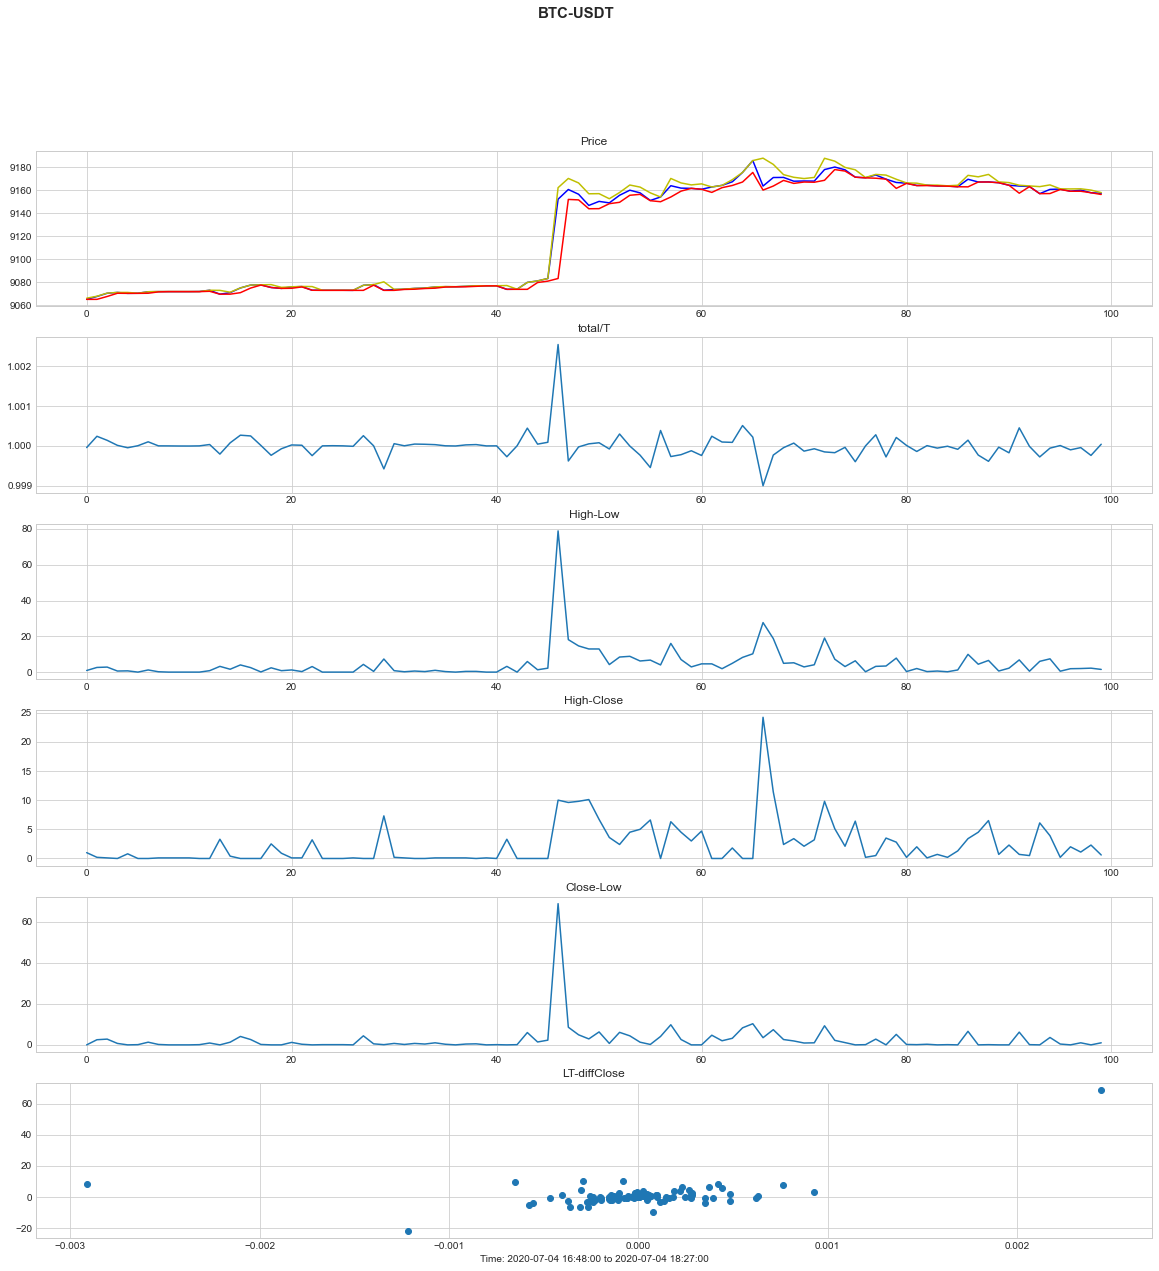

In [85]:
fr = 4350
to = 4450

fig, ax = plt.subplots(nrows=6,
                       ncols=1,
                       figsize=(20,20))
ax[0].plot(a[:,2][fr:to], c='b')
ax[0].plot(a[:,3][fr:to], c='y')
ax[0].plot(a[:,4][fr:to], c='r')
# ax[0].plot(a[:,9][fr:to])
# ax[0].plot(a[:,10][fr:to])
# ax[0].plot(a[:,33][fr:to], c='black')
# ax[0].plot(a[:,35][fr:to], c='black')
ax[0].set(title='Price')

ax[1].plot(a[fr:to,14])
ax[1].set(title='LT')

ax[2].plot(np.subtract(a[:,3],a[:,4])[fr:to])
ax[2].set(title='High-Low')

ax[3].plot(np.subtract(a[:,3],a[:,2])[fr:to])
ax[3].set(title='High-Close')

ax[4].plot(np.subtract(a[:,2],a[:,4])[fr:to])
ax[4].set(title='Close-Low')

ax[5].scatter(x=a[:,19][fr:to], y=a[:,15][fr:to])
ax[5].set(title='LT-diffClose',
       xlabel = f'Time: {a[fr,0]} to {a[to-1,0]}')

fig.suptitle('BTC-USDT', fontsize=15, fontweight='bold');

print(np.var(a[:,2][fr:to]))
print(np.var(a[:,3][fr:to]))
print(np.var(a[:,4][fr:to]))
print(np.var(a[:,8][fr:to]))
print((np.var(np.divide(a[:,5],a[:,6])[fr:to]) * 10**15))

In [66]:
for i in range(len(df.columns)):
    print(f'{i}- {df.columns[i]}')

0- Time
1- Open
2- Close
3- High
4- Low
5- Volume
6- Transaction
7- HA_Close
8- HA_Open
9- HA_High
10- HA_Low
11- HA_CmO
12- TR
13- V/T
14- LT
15- diff_Close
16- diff_V/T
17- diff2_Close
18- diff2_V/T
19- diff_LT
20- diff2_LT


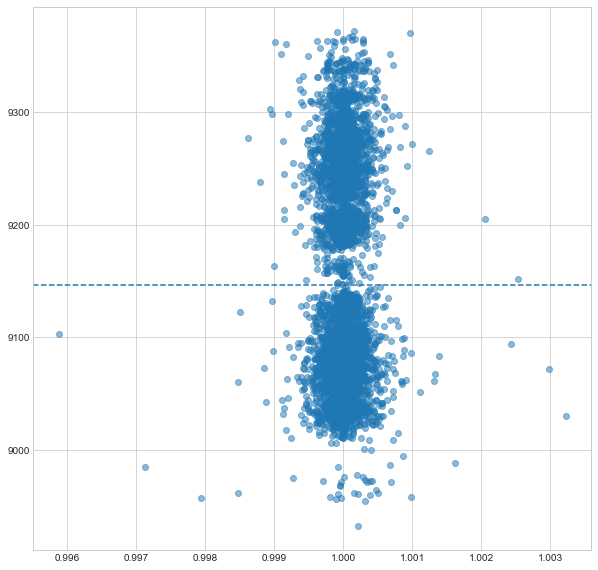

In [67]:
fr = 500
to = 9000
offset = 0
condition = (a[:,8]>0) & (a[:,9] < 0)

x= a[fr:to,14]
y= a[fr+offset:to+offset,2]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=x, y=y, alpha=0.5)
ax.axhline(y=np.mean(y), linestyle='--');


In [72]:
for i in range(len(df.columns)):
    print(f'{i}- {df.columns[i]}')

0- Time
1- Open
2- Close
3- High
4- Low
5- Volume
6- Transaction
7- V/T
8- diff_Close
9- diff_V/T
10- diff2_Close
11- diff2_V/T
12- SMA3
13- SMA10
14- SMA20
15- SMA50
16- SMA100
17- SMA200
18- MACDline12-26
19- MACDsignal9
20- RSI3
21- RSI_V/T3
22- RSI7
23- RSI_V/T7
24- RSI14
25- RSI_V/T14
26- RSI30
27- RSI_V/T30
28- RSI40
29- RSI_V/T40
30- BBANDS_upper5
31- BBANDS_middle5
32- BBANDS_lower5
33- BBANDS_upper10
34- BBANDS_middle10
35- BBANDS_lower10
36- BBANDS_upper20
37- BBANDS_middle20
38- BBANDS_lower20
39- STOCH_k
40- STOCH_d
41- CDL2CROWS
42- CDL3BLACKCROWS
43- CDL3INSIDE
44- CDL3LINESTRIKE
45- CDL3OUTSIDE
46- CDL3STARSINSOUTH
47- CDL3WHITESOLDIERS
48- CDLABANDONEDBABY
49- CDLADVANCEBLOCK
50- CDLBELTHOLD
51- CDLBREAKAWAY
52- CDLCLOSINGMARUBOZU
53- CDLCONCEALBABYSWALL
54- CDLCOUNTERATTACK
55- CDLDARKCLOUDCOVER
56- CDLDOJI
57- CDLDOJISTAR
58- CDLDRAGONFLYDOJI
59- CDLENGULFING
60- CDLEVENINGDOJISTAR
61- CDLEVENINGSTAR
62- CDLGAPSIDESIDEWHITE
63- CDLGRAVESTONEDOJI
64- CDLHAMMER
65- CDLH

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


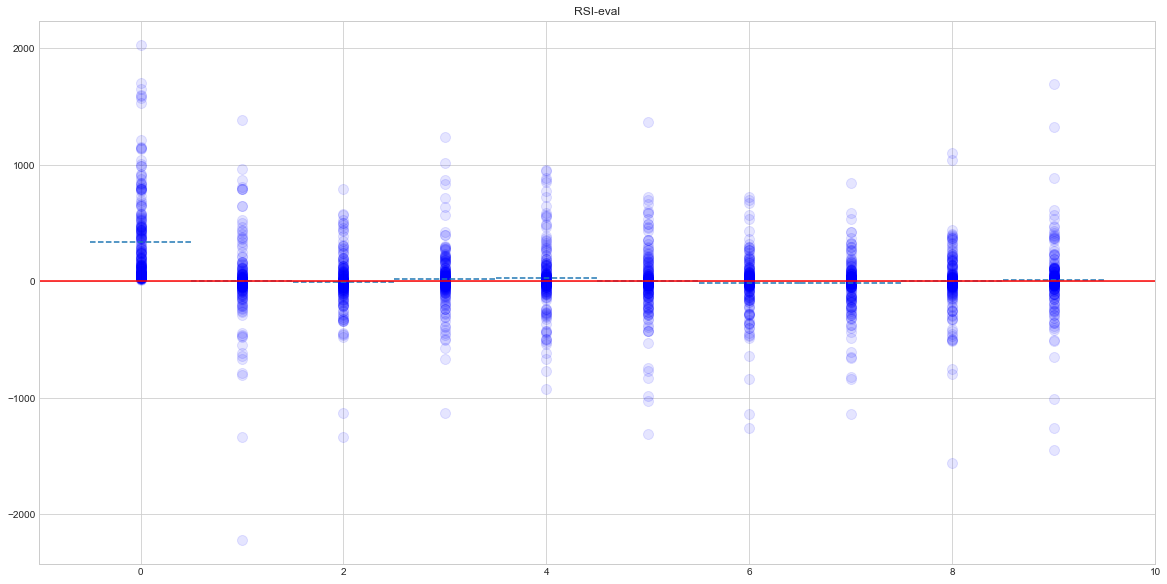

In [41]:
fr=100
to= 19000

# co1 = abs(a[fr:to,12]-a[fr:to,3]) < np.divide(np.subtract(a[fr:to,3],a[fr:to,4]),13)
# co2 = a[fr:to,11] < 0
co3 = a[fr:to,18] < np.mean(a[fr:to,18] < 0)
co4 = a[fr:to,2] > a[fr:to,33]
condition = co4 & co3

after_signal_chart(arr = a,
                   target = 8,
                   fr = fr,
                   to = to,
                   offset = 10,
                   condition = condition,
                   title = 'RSI-eval')

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


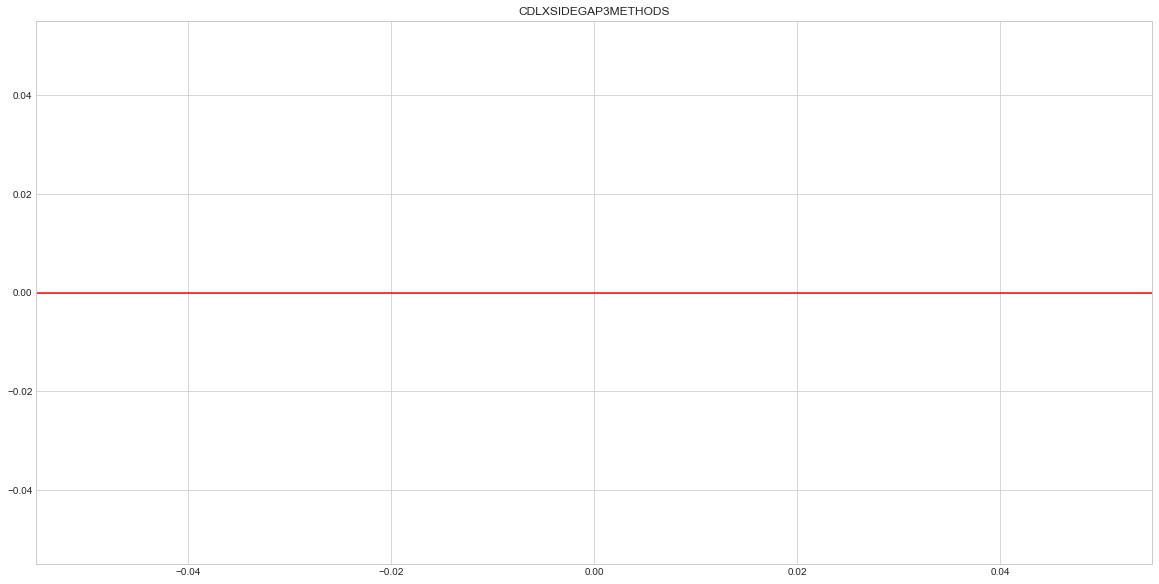

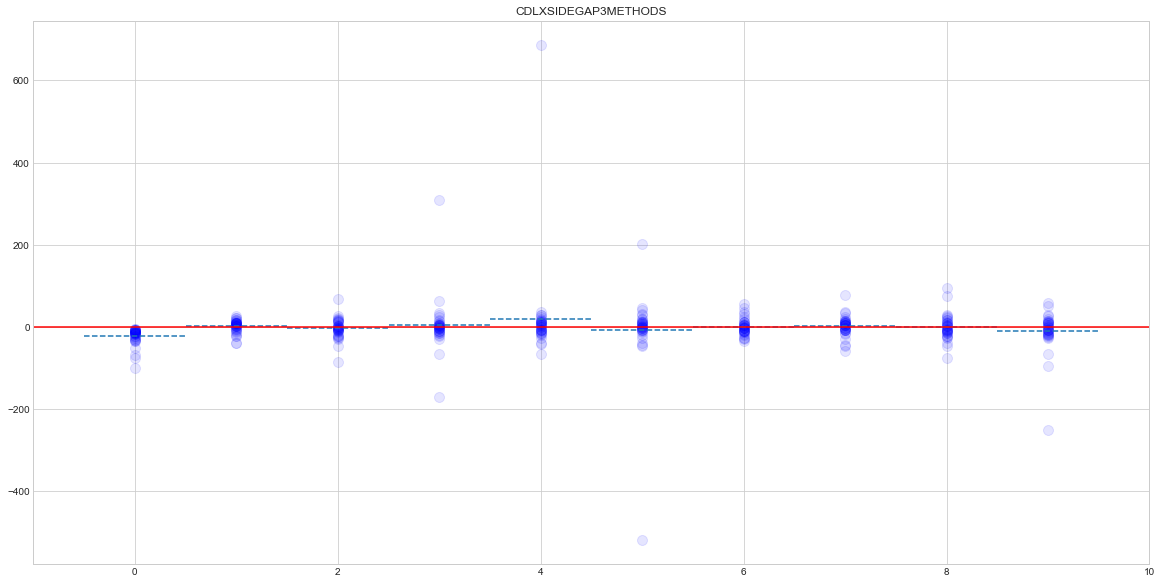

In [227]:
for pattern in range(100,102):
    
    condition = a[:,pattern] > 0
    after_signal_chart(arr = a,
                   target = 8,
                   fr = 10,
                   to = 9000,
                   offset = 10,
                   condition = condition,
                   title = df.columns[target])

# Binary evaluation 

In [6]:
results =[]

for i in range(1000):
    df = random_period(total_data, 288)

    df['V/T'] = df.Volume/df.Transaction
    df['diff_Close'] = df.Close.diff()
    df['diff_V/T'] = df['V/T'].diff()
    df.dropna(inplace= True)

    k = 10**8
    s =0
    f =0
    for i in range(1, len(df)-1):

        if (df['diff_V/T'].iloc[i]*k > df['diff_V/T'].iloc[i-1]*k+10):
            if df.diff_Close.iloc[i+1] >= 0:
                s += 1
            else:
                f += 1
        elif (df['diff_V/T'].iloc[i]*k < df['diff_V/T'].iloc[i-1]*k+10):
            if df.diff_Close.iloc[i+1] <= 0:
                s += 1
            else:
                f += 1
                
    results.append(s/(f+s)*100)

    print(s/(f+s)*100)

print(f'Average: {sum(results)/len(results)}')

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

48.421052631578945
48.771929824561404
49.824561403508774
53.333333333333336
51.578947368421055
50.877192982456144
49.473684210526315
45.614035087719294
52.98245614035088
49.824561403508774
54.385964912280706
51.578947368421055
50.526315789473685
47.719298245614034
48.771929824561404
52.98245614035088
55.43859649122807
49.122807017543856
53.333333333333336
47.368421052631575
49.824561403508774
49.122807017543856
57.19298245614035
47.719298245614034
55.08771929824562
50.877192982456144
53.333333333333336
48.421052631578945
55.319148936170215
50.526315789473685
50.526315789473685
51.92982456140351
41.05263157894737
55.78947368421052
59.64912280701754
52.29681978798587
50.175438596491226
50.877192982456144
50.526315789473685
55.08771929824562
49.473684210526315
43.859649122807014
57.19298245614035
52.98245614035088
48.771929824561404
50.526315789473685
47.719298245614034
47.368421052631575
54.736842105263165
54.736842105263165
50.877192982456144
42.35807860262008
55.08771929824562
47.36842

51.2280701754386
54.385964912280706
51.578947368421055
50.877192982456144
58.718861209964416
50.877192982456144
50.526315789473685
50.526315789473685
50.175438596491226
47.719298245614034
50.175438596491226
50.877192982456144
51.92982456140351
48.771929824561404
49.82332155477032
51.2280701754386
53.68421052631579
49.122807017543856
54.03508771929825
47.01754385964912
50.526315789473685
51.92982456140351
47.368421052631575
55.43859649122807
54.03508771929825
50.175438596491226
48.07017543859649
49.824561403508774
48.421052631578945
52.98245614035088
49.122807017543856
50.175438596491226
49.824561403508774
49.824561403508774
49.473684210526315
48.07017543859649
52.28070175438596
45.96491228070175
54.385964912280706
55.43859649122807
45.26315789473684
53.333333333333336
50.877192982456144
44.56140350877193
49.824561403508774
47.368421052631575
49.824561403508774
43.50877192982456
51.578947368421055
53.68421052631579
51.92982456140351
51.2280701754386
53.68421052631579
49.122807017543856


52.98245614035088
48.421052631578945
58.245614035087726
47.719298245614034
49.824561403508774
42.80701754385965
49.122807017543856
51.92982456140351
44.91228070175438
45.96491228070175
49.122807017543856
48.421052631578945
54.385964912280706
60.70175438596491
51.2280701754386
51.578947368421055
48.771929824561404
47.719298245614034
49.824561403508774
44.91228070175438
52.98245614035088
47.368421052631575
48.07017543859649
43.15789473684211
49.122807017543856
54.736842105263165
50.877192982456144
50.175438596491226
48.771929824561404
48.421052631578945
50.877192982456144
44.21052631578947
54.736842105263165
50.877192982456144
61.05263157894737
52.28070175438596
48.771929824561404
48.421052631578945
50.175438596491226
52.63157894736842
49.122807017543856
55.08771929824562
54.736842105263165
51.92982456140351
51.578947368421055
49.122807017543856
48.771929824561404
51.92982456140351
52.98245614035088
49.473684210526315
50.175438596491226
50.175438596491226
44.56140350877193
48.42105263157

In [59]:
results =[]

for i in range(100):
    df = random_period(total_data, 288)

    df['V/T'] = df.Volume/df.Transaction
    df['diff_Close'] = df.Close.diff()
    df['diff_V/T'] = df['V/T'].diff()
    df.dropna(inplace= True)

    k = 10**8
    s =0
    f =0
    for i in range(1, len(df)-1):

        if (df['diff_V/T'].iloc[i] *10**8 > 5 and df.diff_Close.iloc[i] > 5):
            if df.diff_Close.iloc[i+1] >= 0:
                s += 1
            else:
                f += 1
        elif (df['diff_V/T'].iloc[i] *10**8 < -5 and df.diff_Close.iloc[i] < -5):
            if df.diff_Close.iloc[i+1] <= 0:
                s += 1
            else:
                f += 1
    try:       
        results.append(s/(f+s)*100)
        print(s/(f+s)*100)
    except:
        pass

print(f'Average: {sum(results)/len(results)}')

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

50.0
100.0
41.66666666666667
33.33333333333333
41.17647058823529
100.0
61.53846153846154
37.5
44.44444444444444
40.0
66.66666666666666
37.03703703703704
0.0
66.66666666666666
27.27272727272727
55.172413793103445
50.0
55.26315789473685
52.38095238095239
64.86486486486487
44.44444444444444
0.0
38.46153846153847
50.0
40.0
47.22222222222222
48.78048780487805
52.17391304347826
28.57142857142857
66.66666666666666
50.0
85.71428571428571
45.83333333333333
50.0
100.0
60.0
55.55555555555556
52.38095238095239
77.77777777777779
57.14285714285714
66.66666666666666
60.0
100.0
66.66666666666666
66.66666666666666
10.0
65.38461538461539
60.0
43.75
80.0
48.57142857142857
66.66666666666666
55.55555555555556
66.66666666666666
47.22222222222222
100.0
83.33333333333334
25.0
0.0
80.0
68.42105263157895
50.0
33.33333333333333
57.14285714285714
22.22222222222222
42.857142857142854
66.66666666666666
44.44444444444444
62.5
28.57142857142857
50.0
38.88888888888889
0.0
0.0
40.74074074074074
50.0
57.14285714285714
6

22.22222222222222
66.66666666666666
57.14285714285714
0.0
55.55555555555556
60.0
100.0
40.0
37.93103448275862
75.0
48.275862068965516
35.0
48.38709677419355
0.0
55.55555555555556
100.0
50.0
76.92307692307693
44.11764705882353
50.0
50.0
53.333333333333336
50.0
58.620689655172406
58.333333333333336
50.0
44.44444444444444
50.0
53.84615384615385
33.33333333333333
50.0
61.111111111111114
47.82608695652174
73.68421052631578
0.0
44.827586206896555
42.857142857142854
50.0
57.692307692307686
63.63636363636363
47.368421052631575
59.09090909090909
49.056603773584904
100.0
44.18604651162791
100.0
75.0
50.0
41.17647058823529
90.0
50.0
66.66666666666666
50.0
54.23728813559322
55.00000000000001
44.44444444444444
44.11764705882353
42.857142857142854
33.33333333333333
46.666666666666664
47.368421052631575
71.42857142857143
60.526315789473685
50.0
45.45454545454545
100.0
50.0
66.66666666666666
75.0
50.0
0.0
50.0
75.0
60.0
100.0
46.875
54.54545454545454
66.66666666666666
52.63157894736842
27.272727272727

In [5]:
results =[]

for i in range(1000):
    df = random_period(total_data, 288)

    df['V/T'] = df.Volume/df.Transaction
    df['diff_Close'] = df.Close.diff()
    df['diff_V/T'] = df['V/T'].diff()
    df.dropna(inplace= True)

    k = 10**8
    s =0
    f =0
    for i in range(1, len(df)-1):

        if (df['diff_V/T'].iloc[i]*k > df['diff_V/T'].iloc[i-1]*k+10 and df.diff_Close.iloc[i+1] > df.diff_Close.iloc[i]) or (df['diff_V/T'].iloc[i]*k < df['diff_V/T'].iloc[i-1]*k-10 and df.diff_Close.iloc[i+1] < df.diff_Close.iloc[i]):
            s += 1
        elif (df['diff_V/T'].iloc[i]*k > df['diff_V/T'].iloc[i-1]*k+10 and df.diff_Close.iloc[i+1] < df.diff_Close.iloc[i]) or (df['diff_V/T'].iloc[i]*k < df['diff_V/T'].iloc[i-1]*k-10 and df.diff_Close.iloc[i+1] > df.diff_Close.iloc[i]):
            f += 1

    try:            
        results.append(s/(f+s)*100)
        print(s/(f+s)*100)
    except:
        pass

print(f'Average: {sum(results)/len(results)}')

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

70.45454545454545
69.35483870967742
63.81909547738693
93.33333333333333
70.33898305084746
69.72477064220183
71.42857142857143
63.43283582089553
74.4186046511628
100.0
69.33962264150944
66.875
65.55555555555556
81.37254901960785
67.6923076923077
74.19354838709677
57.49999999999999
65.38461538461539
63.63636363636363
92.85714285714286
78.26086956521739
50.0
69.80198019801979
86.95652173913044
67.12328767123287
84.61538461538461
76.19047619047619
63.05732484076433
61.98830409356725
83.33333333333334
67.66467065868264
100.0
65.60000000000001
70.0
65.09433962264151
80.95238095238095
75.0
83.33333333333334
65.73426573426573
70.48458149779736
50.0
82.35294117647058
67.5
77.41935483870968
66.07142857142857
44.44444444444444
62.96296296296296
68.08510638297872
68.23529411764706
66.66666666666666
63.1578947368421
68.33333333333333
76.36363636363637
100.0
66.66666666666666
69.6969696969697
66.66666666666666
67.14285714285714
64.76683937823834
65.86826347305389
64.28571428571429
63.69426751592356


64.49704142011834
50.0
73.68421052631578
73.33333333333333
74.07407407407408
67.03296703296702
66.4179104477612
71.50837988826815
72.22222222222221
50.877192982456144
62.7906976744186
68.12749003984064
68.3982683982684
73.61111111111111
100.0
77.0
82.6086956521739
80.0
74.24242424242425
68.42105263157895
66.66666666666666
88.46153846153845
71.62162162162163
76.66666666666667
100.0
84.61538461538461
75.5980861244019
73.17073170731707
72.98850574712644
68.42105263157895
69.40298507462687
80.88235294117648
67.52136752136752
65.0
70.58823529411765
100.0
73.68421052631578
71.69811320754717
62.32558139534884
68.78612716763006
74.66666666666667
60.0
50.0
68.30985915492957
69.89247311827957
71.29629629629629
77.03703703703704
100.0
73.07692307692307
70.96774193548387
66.16161616161617
100.0
74.19354838709677
75.0
65.29680365296804
73.4375
64.45497630331754
72.41379310344827
67.2514619883041
68.08510638297872
76.37795275590551
75.0
62.655601659751035
62.83185840707964
77.27272727272727
70.64220

In [141]:
results =[]
l = []
for i in range(1000):
    df = random_period(total_data, 288)

    df['V/T'] = df.Volume/df.Transaction
    df['diff_Close'] = df.Close.diff()
    df['diff_V/T'] = df['V/T'].diff()
    df['diff2_Close'] = df.diff_Close.diff()
    df.dropna(inplace= True)

    k = 10**8
    s =0
    f =0
    for i in range(1, len(df)-1):

        if df['diff2_Close'].iloc[i]*k > 0 :
            if df.diff2_Close.iloc[i+1] < 0:
                s += 1
            else:
                f += 1
                
        elif df['diff2_Close'].iloc[i]*k < 0:
            if df.diff2_Close.iloc[i+1] > 0:
                s += 1
            else:
                f += 1
                

    try:            
        results.append(s/(f+s)*100)
        print(s/(f+s)*100)
    except:
        pass

print(f'Average: {sum(results)/len(results)}')

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

67.6056338028169
68.30985915492957
62.323943661971825
63.02816901408451
68.66197183098592
65.49295774647888
69.36619718309859
62.676056338028175
66.90140845070422
67.37588652482269
68.30985915492957
67.25352112676056
67.25352112676056
65.49295774647888
68.30985915492957
75.70422535211267
65.49295774647888
63.38028169014085
71.12676056338029
65.49295774647888
67.6056338028169
64.7887323943662
69.01408450704226
65.14084507042254
67.49116607773851
66.90140845070422
68.90459363957598
64.53900709219859
67.25352112676056
67.6056338028169
64.43661971830986
65.24822695035462
67.25352112676056
72.53521126760563
65.84507042253522
64.43661971830986
72.1830985915493
67.95774647887323
65.24822695035462
67.73049645390071
67.25352112676056
68.30985915492957
64.43661971830986
63.38028169014085
68.66197183098592
69.36619718309859
67.95774647887323
67.95774647887323
69.71830985915493
68.30985915492957
64.7887323943662
67.25352112676056
64.43661971830986
66.90140845070422
67.6056338028169
69.366197183098

66.90140845070422
65.49295774647888
68.30985915492957
66.19718309859155
70.07042253521126
68.66197183098592
69.36619718309859
66.54929577464789
67.6056338028169
68.66197183098592
69.36619718309859
67.6056338028169
64.08450704225352
67.95774647887323
68.30985915492957
68.30985915492957
66.19718309859155
65.49295774647888
66.31205673758865
69.01408450704226
66.90140845070422
64.08450704225352
69.36619718309859
66.90140845070422
65.49295774647888
67.49116607773851
64.08450704225352
67.49116607773851
69.36619718309859
63.732394366197184
67.6056338028169
68.66197183098592
64.7887323943662
69.01408450704226
73.59154929577466
71.47887323943662
62.323943661971825
68.66197183098592
70.07042253521126
64.43661971830986
67.13780918727915
69.71830985915493
60.2112676056338
74.64788732394366
66.90140845070422
64.7887323943662
66.19718309859155
64.43661971830986
71.47887323943662
68.08510638297872
67.25352112676056
68.66197183098592
65.60283687943263
64.43661971830986
72.88732394366197
66.19718309859

67.95774647887323
66.90140845070422
69.01408450704226
69.71830985915493
66.90140845070422
67.6056338028169
70.77464788732394
69.01408450704226
63.38028169014085
66.90140845070422
70.77464788732394
69.01408450704226
65.49295774647888
63.732394366197184
67.95774647887323
66.19718309859155
67.95774647887323
65.14084507042254
66.54929577464789
66.54929577464789
65.14084507042254
64.43661971830986
70.77464788732394
63.38028169014085
67.6056338028169
67.95774647887323
70.77464788732394
61.61971830985915
65.95744680851064
67.25352112676056
67.25352112676056
63.732394366197184
70.4225352112676
68.66197183098592
69.96466431095406
66.54929577464789
65.84507042253522
66.19718309859155
67.25352112676056
66.19718309859155
67.95774647887323
65.14084507042254
61.267605633802816
67.84452296819788
66.90140845070422
68.66197183098592
66.78445229681978
69.71830985915493
70.77464788732394
65.84507042253522
65.49295774647888
69.71830985915493
67.95774647887323
69.01408450704226
69.54887218045113
66.1971830

In [ ]:
results =[]
l = []
for i in range(1000):
    df = random_period(total_data, 288)

    df['V/T'] = df.Volume/df.Transaction
    df['diff_Close'] = df.Close.diff()
    df['diff_V/T'] = df['V/T'].diff()
    df['diff2_Close'] = df.diff_Close.diff()
    df.dropna(inplace= True)

    k = 10**8
    s =0
    f =0
    for i in range(1, len(df)-1):
        
        if (df['diff2_Close'].iloc[i] > 0 and df.diff_Close.iloc[i] > 0) or (df['diff2_Close'].iloc[i] < 0 and df.diff_Close.iloc[i] < 0):
            s += 1

        else:
            f += 1
                

    try:            
        results.append(s/(f+s)*100)
        print(s/(f+s)*100)
    except:
        pass

print(f'Average: {sum(results)/len(results)}')

# Combining

In [150]:
results =[]
l = []
for i in range(1000):
    df = random_period(total_data, 288)

    df['V/T'] = df.Volume/df.Transaction
    df['diff_Close'] = df.Close.diff()
    df['diff_V/T'] = df['V/T'].diff()
    df['diff2_Close'] = df.diff_Close.diff()
    df.dropna(inplace= True)

    k = 10**8
    s =0
    f =0
                   
    for i in range(1, len(df)-1):

        target1 = df.diff2_Close.iloc[i+1] > 0
        condition1 = df['diff2_Close'].iloc[i]*k < df['diff2_Close'].iloc[i-1]*k+0
        condition2 = df['diff_V/T'].iloc[i]*k > df['diff_V/T'].iloc[i-1]*k+3
        condition3 = df['diff2_Close'].iloc[i]*k < 0
        condition4 = df.diff_Close.iloc[i] < 0

        target_1 = df.diff2_Close.iloc[i+1] < 0
        condition_1 = df['diff2_Close'].iloc[i]*k > df['diff2_Close'].iloc[i-1]*k+0
        condition_2 = df['diff_V/T'].iloc[i]*k < df['diff_V/T'].iloc[i-1]*k+3
        condition_3 = df['diff2_Close'].iloc[i]*k > 0
        condition_4 = df.diff_Close.iloc[i] > 0

        if condition1  and condition2 and condition3 and condition4:
            if target1:
                s += 1
            else:
                f += 1
                
        elif condition_1  and condition_2 and condition_3 and condition_4:
            if target_1:
                s += 1
            else:
                f += 1
                

    try:            
        results.append(s/(f+s)*100)
        print(s/(f+s)*100)
    except:
        pass

print(f'Average: {sum(results)/len(results)}')

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

81.3953488372093
81.06060606060606
78.15126050420169
80.43478260869566
77.87610619469027
78.125
79.8507462686567
81.3953488372093
80.15873015873017
81.56028368794325
80.83333333333333
80.1526717557252
79.2
77.68595041322314
74.21875
76.27118644067797
82.94573643410853
78.84615384615384
83.45864661654136
84.375
77.95275590551181
80.73394495412845
79.33884297520662
77.19298245614034
78.90625
80.0
85.27131782945736
85.49618320610686
75.39682539682539
74.80314960629921
83.76068376068376
81.06060606060606
80.7017543859649
78.16901408450704
86.0655737704918
79.46428571428571
89.0909090909091
79.38931297709924
76.19047619047619
80.31496062992126
84.0
83.89830508474576
77.98165137614679
79.33884297520662
85.38461538461539
78.15126050420169
81.89655172413794
84.84848484848484
76.19047619047619
82.35294117647058
81.25
80.0
83.2
71.65354330708661
83.20610687022901
78.78787878787878
80.8695652173913
80.64516129032258
80.48780487804879
84.50704225352112
79.67479674796748
77.39130434782608
75.0
79.6

79.69924812030075
82.8125
83.46456692913385
73.84615384615385
81.88976377952756
79.66101694915254
79.48717948717949
78.0701754385965
78.0
80.57553956834532
80.95238095238095
76.33587786259542
73.55371900826447
78.68852459016394
78.78787878787878
77.34375
76.19047619047619
74.21875
81.73913043478261
81.02189781021897
85.59322033898306
75.67567567567568
72.93233082706767
80.0
81.53846153846153
74.79674796747967
80.31496062992126
78.74015748031496
80.0
82.03125
81.88976377952756
76.19047619047619
78.62068965517241
81.88976377952756
79.2
83.05084745762711
82.92682926829268
77.34375
79.67479674796748
79.67479674796748
80.16528925619835
85.9504132231405
81.19658119658119
79.2
80.16528925619835
75.22123893805309
75.0
76.10619469026548
78.70370370370371
82.44274809160305
81.203007518797
78.18181818181819
82.75862068965517
81.14754098360656
85.71428571428571
76.22950819672131
78.03030303030303
80.17241379310344
78.19548872180451
82.11382113821138
79.66101694915254
78.62595419847328
81.512605042

# Light / Dark

In [151]:
light= 0
dark= 0

for i in range(len(df)):
    
    condition1 = df['diff2_Close'].iloc[i]*k < df['diff2_Close'].iloc[i-1]*k+0
    condition2 = df['diff_V/T'].iloc[i]*k > df['diff_V/T'].iloc[i-1]*k+3
    condition3 = df['diff2_Close'].iloc[i]*k < 0
    condition4 = df.diff_Close.iloc[i] < 0
    
    condition_1 = df['diff2_Close'].iloc[i]*k > df['diff2_Close'].iloc[i-1]*k+0
    condition_2 = df['diff_V/T'].iloc[i]*k < df['diff_V/T'].iloc[i-1]*k+3
    condition_3 = df['diff2_Close'].iloc[i]*k > 0
    condition_4 = df.diff_Close.iloc[i] > 0
    
    if (condition1  and condition2 and condition3 and condition4) or (condition_1  and condition_2 and condition_3 and condition_4):
        light += 1
    else:
        dark += 1

print(light/(light+dark) * 100)

39.51048951048951


# Comparison

# Strategies

## Strat 1

In [73]:
results = []
hold_results = []
nTrade_list = []
lWin = []
lLoss = []
nWin = 0
nLoss = 0
for i in range(150):
    df = random_period(total_data, 4320)

    df['V/T'] = df.Volume/df.Transaction
    df['diff_Close'] = df.Close.diff()
    df['diff_V/T'] = df['V/T'].diff()
    df.dropna()

    k = 10**8
    balance = 1000
    coin = 0
    nTrade = 0
    position= False
    hold = balance/df['Close'].iloc[0]
    
    for i in range(1, len(df)-1):
        if position == False:
            if df['diff_V/T'].iloc[i]*k > df['diff_V/T'].iloc[i-1]*k+3.5:
                buy= balance
                balance -= buy
                coin += buy/df['Close'].iloc[i]
                position = True
        else:
            if df['diff_V/T'].iloc[i]*k < df['diff_V/T'].iloc[i-1]*k-3.5:
                sell= coin
                coin -= sell
                balance += sell*df['Close'].iloc[i]
                position = False
                nTrade += 1


    balance += coin*df['Close'].iloc[len(df)-1]
    profit = round(((balance/1000)-1)*100, 2)
    hold_profit = round(((hold*df['Close'].iloc[len(df)-1]/1000)-1)*100, 2)
    results.append(profit)
    hold_results.append(hold_profit)
    nTrade_list.append(nTrade)
    
    if profit >= 0:
        lWin.append(profit)
        nWin += 1
    else:
        lLoss.append(profit)
        nLoss += 1
    
    print(f'\nYour balance: {balance}\nYour profit: %{profit}\nYour profit if you hold: %{hold_profit}\nYour number of trades: {nTrade}')
    
average_profit = sum(results)/len(results)
average_hold_profit = sum(hold_results)/len(hold_results)
average_nTrade = sum(nTrade_list)/len(nTrade_list)
average_wins = sum(lWin)/len(lWin)
average_losses = sum(lLoss)/len(lLoss)

print(f'\n\nYour average tradeprofit per period: %{average_profit}')
print(f'Your average hold-profit per period: %{average_hold_profit}')
print(f'Your probability to get profit: %{nWin/(nWin+nLoss) * 100}')
print(f'Your average of wins: %{average_wins}')
print(f'Your average of losses: %{average_losses}')
print(f'Your average of number of trades: {average_nTrade}')


C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic


Your balance: 897.8949798918638
Your profit: %-10.21
Your profit if you hold: %-24.05
Your number of trades: 1324

Your balance: 1062.8292815704865
Your profit: %6.28
Your profit if you hold: %11.89
Your number of trades: 1278

Your balance: 1546.0084949524128
Your profit: %54.6
Your profit if you hold: %36.06
Your number of trades: 955

Your balance: 1266.8107590004354
Your profit: %26.68
Your profit if you hold: %16.79
Your number of trades: 1274

Your balance: 1505.0221497965629
Your profit: %50.5
Your profit if you hold: %98.12
Your number of trades: 1329

Your balance: 1030.4861330528959
Your profit: %3.05
Your profit if you hold: %1.98
Your number of trades: 1265

Your balance: 848.2538208059098
Your profit: %-15.17
Your profit if you hold: %-19.47
Your number of trades: 1320

Your balance: 2372.816693279762
Your profit: %137.28
Your profit if you hold: %151.18
Your number of trades: 1261

Your balance: 1253.8987428384287
Your profit: %25.39
Your profit if you hold: %44.2
Your n


Your balance: 801.5879065703016
Your profit: %-19.84
Your profit if you hold: %9.05
Your number of trades: 1290

Your balance: 1047.5498121763987
Your profit: %4.75
Your profit if you hold: %32.72
Your number of trades: 1032

Your balance: 1264.864779988647
Your profit: %26.49
Your profit if you hold: %78.92
Your number of trades: 1265

Your balance: 925.4272729527711
Your profit: %-7.46
Your profit if you hold: %-12.17
Your number of trades: 1323

Your balance: 1316.5160527052415
Your profit: %31.65
Your profit if you hold: %-11.41
Your number of trades: 1173

Your balance: 1124.270716638962
Your profit: %12.43
Your profit if you hold: %17.29
Your number of trades: 1280

Your balance: 866.6757313100017
Your profit: %-13.33
Your profit if you hold: %-17.27
Your number of trades: 1257

Your balance: 815.2046630260462
Your profit: %-18.48
Your profit if you hold: %-34.36
Your number of trades: 999

Your balance: 966.6866933460568
Your profit: %-3.33
Your profit if you hold: %-12.29
Your


Your balance: 891.6165180587731
Your profit: %-10.84
Your profit if you hold: %-0.9
Your number of trades: 1052


Your average tradeprofit per period: %16.429666666666662
Your average hold-profit per period: %22.943600000000004
Your probability to get profit: %64.0
Your average of wins: %35.89447916666668
Your average of losses: %-18.17444444444445
Your average of number of trades: 1220.64


## Strat 2

In [331]:
results = []
hold_results = []
nTrade_list = []
nWin = 0
nLoss = 0
for i in range(500):
    df = random_period(total_data, 1440)

    df['V/T'] = df.Volume/df.Transaction
    df['diff_Close'] = df.Close.diff()
    df['diff_V/T'] = df['V/T'].diff()
    df['diff2_Close'] = df.diff_Close.diff()
    df['diff2_V/T'] = df['diff_V/T'].diff()


    balance = 1000
    coin = 0
    nTrade = 0
    position= False
    hold = balance/df['Close'].iloc[0]
    
    for i in range(1, len(df)-1):
        if position == False:
            if (df['diff2_V/T'].iloc[i]>0 and df.diff_Close.iloc[i] < 0):
                buy= balance
                balance -= buy
                coin += buy/df['Close'].iloc[i]
                position = True
        else:
            if (df['diff2_V/T'].iloc[i]<0 and df.diff_Close.iloc[i] > 0):
                sell= coin
                coin -= sell
                balance += sell*df['Close'].iloc[i]
                position = False
                nTrade += 1


    balance += coin*df['Close'].iloc[len(df)-1]
    profit = round(((balance/1000)-1)*100, 2)
    hold_profit = round(((hold*df['Close'].iloc[len(df)-1]/1000)-1)*100, 2)
    results.append(profit)
    hold_results.append(hold_profit)
    nTrade_list.append(nTrade)
    
    if profit >= 0:
        nWin += 1
    else:
        nLoss += 1
    
    print(f'\nYour balance: {balance}\nYour profit: %{profit}\nYour profit if you hold: %{hold_profit}\nYour number of trades: {nTrade}')
    
average_profit = sum(results)/len(results)
average_hold_profit = sum(hold_results)/len(hold_results)
average_nTrade = sum(nTrade_list)/len(nTrade_list)

print(f'\n\nYour average tradeprofit per period: %{average_profit}')
print(f'Your average hold-profit per period: %{average_hold_profit}')
print(f'Your probability to get profit: %{nWin/(nWin+nLoss) * 100}')
print(f'Your average of number of trades: {average_nTrade}')


C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic


Your balance: 1220.9058432574268
Your profit: %22.09
Your profit if you hold: %10.07
Your number of trades: 285

Your balance: 1321.7274822766299
Your profit: %32.17
Your profit if you hold: %25.3
Your number of trades: 315

Your balance: 1147.2773944523883
Your profit: %14.73
Your profit if you hold: %31.24
Your number of trades: 283

Your balance: 1052.9673836869044
Your profit: %5.3
Your profit if you hold: %6.28
Your number of trades: 277

Your balance: 1103.80731549965
Your profit: %10.38
Your profit if you hold: %12.11
Your number of trades: 293

Your balance: 1504.9148973496824
Your profit: %50.49
Your profit if you hold: %81.33
Your number of trades: 297

Your balance: 1243.6718712765557
Your profit: %24.37
Your profit if you hold: %13.48
Your number of trades: 284

Your balance: 1187.554651469147
Your profit: %18.76
Your profit if you hold: %7.47
Your number of trades: 290

Your balance: 997.9565071631768
Your profit: %-0.2
Your profit if you hold: %-3.86
Your number of trade


Your balance: 1219.9913458047513
Your profit: %22.0
Your profit if you hold: %20.41
Your number of trades: 284

Your balance: 1012.7165166253803
Your profit: %1.27
Your profit if you hold: %12.45
Your number of trades: 294

Your balance: 1180.496295215013
Your profit: %18.05
Your profit if you hold: %19.57
Your number of trades: 309

Your balance: 1043.312206455604
Your profit: %4.33
Your profit if you hold: %9.97
Your number of trades: 270

Your balance: 1296.481175224664
Your profit: %29.65
Your profit if you hold: %33.18
Your number of trades: 306

Your balance: 1226.0292277137871
Your profit: %22.6
Your profit if you hold: %1.33
Your number of trades: 309

Your balance: 1105.109732819977
Your profit: %10.51
Your profit if you hold: %-1.79
Your number of trades: 322

Your balance: 1669.4896065701241
Your profit: %66.95
Your profit if you hold: %54.36
Your number of trades: 284

Your balance: 1340.2714255932742
Your profit: %34.03
Your profit if you hold: %41.26
Your number of trade


Your balance: 1069.585891483245
Your profit: %6.96
Your profit if you hold: %-1.63
Your number of trades: 298

Your balance: 927.3352582155273
Your profit: %-7.27
Your profit if you hold: %-2.72
Your number of trades: 296

Your balance: 1316.2000038552649
Your profit: %31.62
Your profit if you hold: %-1.87
Your number of trades: 312

Your balance: 1363.1285706367134
Your profit: %36.31
Your profit if you hold: %23.84
Your number of trades: 312

Your balance: 1301.8902695955953
Your profit: %30.19
Your profit if you hold: %42.62
Your number of trades: 306

Your balance: 1094.13919898488
Your profit: %9.41
Your profit if you hold: %-19.77
Your number of trades: 291

Your balance: 932.4665427344751
Your profit: %-6.75
Your profit if you hold: %-3.87
Your number of trades: 296

Your balance: 914.462210915686
Your profit: %-8.55
Your profit if you hold: %-22.92
Your number of trades: 307

Your balance: 1156.03482920475
Your profit: %15.6
Your profit if you hold: %5.77
Your number of trades


Your balance: 1470.0249706438992
Your profit: %47.0
Your profit if you hold: %59.13
Your number of trades: 302

Your balance: 1169.4775877277486
Your profit: %16.95
Your profit if you hold: %18.5
Your number of trades: 296

Your balance: 1139.3572082923922
Your profit: %13.94
Your profit if you hold: %-7.29
Your number of trades: 298

Your balance: 1092.9777824460223
Your profit: %9.3
Your profit if you hold: %-3.69
Your number of trades: 284

Your balance: 1325.5061423553282
Your profit: %32.55
Your profit if you hold: %15.18
Your number of trades: 309

Your balance: 1157.8464347753186
Your profit: %15.78
Your profit if you hold: %-29.44
Your number of trades: 293

Your balance: 1264.3140253483625
Your profit: %26.43
Your profit if you hold: %30.27
Your number of trades: 279

Your balance: 1163.9729174352779
Your profit: %16.4
Your profit if you hold: %0.96
Your number of trades: 315

Your balance: 1469.706561937341
Your profit: %46.97
Your profit if you hold: %24.86
Your number of t


Your balance: 1102.2157583337303
Your profit: %10.22
Your profit if you hold: %44.73
Your number of trades: 280

Your balance: 1201.9897660415727
Your profit: %20.2
Your profit if you hold: %-36.33
Your number of trades: 308

Your balance: 1254.7478566743407
Your profit: %25.47
Your profit if you hold: %-30.87
Your number of trades: 302

Your balance: 1281.7585145698113
Your profit: %28.18
Your profit if you hold: %23.36
Your number of trades: 307

Your balance: 1133.8321886781791
Your profit: %13.38
Your profit if you hold: %34.96
Your number of trades: 306

Your balance: 946.8581336562514
Your profit: %-5.31
Your profit if you hold: %-20.06
Your number of trades: 292

Your balance: 1095.997247313626
Your profit: %9.6
Your profit if you hold: %38.01
Your number of trades: 300

Your balance: 926.8352083816717
Your profit: %-7.32
Your profit if you hold: %-49.54
Your number of trades: 300

Your balance: 1297.0562564495951
Your profit: %29.71
Your profit if you hold: %13.86
Your number 


Your balance: 1153.210018809468
Your profit: %15.32
Your profit if you hold: %42.79
Your number of trades: 297

Your balance: 1039.2349944091702
Your profit: %3.92
Your profit if you hold: %-12.55
Your number of trades: 293

Your balance: 1166.009265905744
Your profit: %16.6
Your profit if you hold: %-3.96
Your number of trades: 299

Your balance: 1155.1645386233563
Your profit: %15.52
Your profit if you hold: %-12.59
Your number of trades: 315

Your balance: 1134.9282595125123
Your profit: %13.49
Your profit if you hold: %30.58
Your number of trades: 284

Your balance: 1121.6807649100458
Your profit: %12.17
Your profit if you hold: %1.16
Your number of trades: 293

Your balance: 969.3206879051003
Your profit: %-3.07
Your profit if you hold: %9.76
Your number of trades: 282

Your balance: 1142.947763312845
Your profit: %14.29
Your profit if you hold: %-8.22
Your number of trades: 316

Your balance: 1128.540987410659
Your profit: %12.85
Your profit if you hold: %1.57
Your number of tra


Your balance: 948.1997497813593
Your profit: %-5.18
Your profit if you hold: %-16.42
Your number of trades: 283

Your balance: 1850.4126815557304
Your profit: %85.04
Your profit if you hold: %-38.04
Your number of trades: 298

Your balance: 1151.1452694353952
Your profit: %15.11
Your profit if you hold: %9.18
Your number of trades: 311

Your balance: 908.1700970514061
Your profit: %-9.18
Your profit if you hold: %-12.29
Your number of trades: 284

Your balance: 1060.5645858956461
Your profit: %6.06
Your profit if you hold: %-11.41
Your number of trades: 312

Your balance: 967.1463125399482
Your profit: %-3.29
Your profit if you hold: %-17.39
Your number of trades: 308

Your balance: 986.2535395667794
Your profit: %-1.37
Your profit if you hold: %-2.38
Your number of trades: 285

Your balance: 1285.378781079085
Your profit: %28.54
Your profit if you hold: %19.35
Your number of trades: 309

Your balance: 1148.027222554774
Your profit: %14.8
Your profit if you hold: %22.33
Your number of

## Strat 3

In [61]:
results = []
hold_results = []
nTrade_list = []
nWin = 0
nLoss = 0
for i in range(100):
    df = random_period(total_data, 60)

    df['V/T'] = df.Volume/df.Transaction
    df['diff_Close'] = df.Close.diff()
    df['diff_V/T'] = df['V/T'].diff()

    df.dropna()

    k = 10**8
    balance = 1000
    coin = 0
    nTrade = 0
    position= False
    hold = balance/df['Close'].iloc[0]
    
    
    
    for i in range(1, len(df)-1):
        
        if condition:
            buy= balance
            balance -= buy
            coin += buy/df['Close'].iloc[i]
        else:
            sell= coin
            coin -= sell
            balance += sell*df['Close'].iloc[i+1]
            nTrade += 1
            
#         else:
#             if df['diff_V/T'].iloc[i]*k > df['diff_V/T'].iloc[i-1]*k:
#                 sell= coin
#                 coin -= sell
#                 balance += sell*df['Close'].iloc[i]
#                 position = False
#                 nTrade += 1


    balance += coin*df['Close'].iloc[len(df)-1]
    profit = round(((balance/1000)-1)*100, 2)
    hold_profit = round(((hold*df['Close'].iloc[len(df)-1]/1000)-1)*100, 2)
    results.append(profit)
    hold_results.append(hold_profit)
    nTrade_list.append(nTrade)
    
    if profit >= 0:
        nWin += 1
    else:
        nLoss += 1
    
    print(f'\nYour balance: {balance}\nYour profit: %{profit}\nYour profit if you hold: %{hold_profit}\nYour number of trades: {nTrade}')
    
average_profit = sum(results)/len(results)
average_hold_profit = sum(hold_results)/len(hold_results)
average_nTrade = sum(nTrade_list)/len(nTrade_list)

print(f'\n\nYour average tradeprofit per period: %{average_profit}')
print(f'Your average hold-profit per period: %{average_hold_profit}')
print(f'Your probability to get profit: %{nWin/(nWin+nLoss) * 100}')
print(f'Your average of number of trades: {average_nTrade}')


C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Strat 4

In [8]:
results = []
hold_results = []
nTrade_list = []
lWin = []
lLoss = []
nWin = 0
nLoss = 0
for i in range(100):
    df = random_period(total_data, 24*4*30)

    df['V/T'] = df.Volume/df.Transaction
    df['diff_Close'] = df.Close.diff()
    df['diff_V/T'] = df['V/T'].diff()
    SMA_period = [3,10, 20, 50, 100, 200]
    if not f'SMA{SMA_period}' in df.columns:
        for period in SMA_period:
            df[f'SMA{period}'] = talib.SMA(df.Close, timeperiod= period)
            
    df.dropna()
    
    k = 10**8
    balance = 1000
    coin = 0
    nTrade = 0
    position= False
    hold = balance/df['Close'].iloc[0]

    offset = 2
    
    for i in range(offset, len(df)-offset):
        byu_signal = df.SMA10.iloc[i] < df.SMA10.iloc[i-1] and df.SMA10.iloc[i] < df.SMA20.iloc[i] and abs(df.SMA20.iloc[i] - df.Low.iloc[i]) < 0.0005*df.Close.iloc[i]
        sell_signal = df.SMA10.iloc[i] > df.SMA10.iloc[i-1] and df.SMA10.iloc[i] > df.SMA20.iloc[i] and abs(df.SMA20.iloc[i] - df.High.iloc[i]) < 0.0005*df.Close.iloc[i]
        

        if byu_signal:
            buy= balance
            balance -= buy
            coin += buy/df['Close'].iloc[i+1]
            position = True
            sell= coin
            coin -= sell
            balance += sell*df['Close'].iloc[i+offset]
            position = False
            nTrade += 1

        if sell_signal:
            buy= balance
            balance -= buy
            coin += buy/df['Close'].iloc[i+offset]
            position = True
            sell= coin
            coin -= sell
            balance += sell*df['Close'].iloc[i+1]
            position = False
            nTrade += 1


    balance += coin*df['Close'].iloc[len(df)-1]
    profit = round(((balance/1000)-1)*100, 2)
    hold_profit = round(((hold*df['Close'].iloc[len(df)-1]/1000)-1)*100, 2)
    results.append(profit)
    hold_results.append(hold_profit)
    nTrade_list.append(nTrade)
    
    if profit >= 0:
        lWin.append(profit)
        nWin += 1
    else:
        lLoss.append(profit)
        nLoss += 1
    
    print(f'\nYour balance: {balance}\nYour profit: %{profit}\nYour profit if you hold: %{hold_profit}\nYour number of trades: {nTrade}')
    
average_profit = sum(results)/len(results)
average_hold_profit = sum(hold_results)/len(hold_results)
average_nTrade = sum(nTrade_list)/len(nTrade_list)
average_wins = sum(lWin)/len(lWin)
average_losses = sum(lLoss)/len(lLoss)

print(f'\n\nYour average tradeprofit per period: %{average_profit}')
print(f'Your average hold-profit per period: %{average_hold_profit}')
print(f'Your probability to get profit: %{nWin/(nWin+nLoss) * 100}')
print(f'Your average of wins: %{average_wins}')
print(f'Your average of losses: %{average_losses}')
print(f'Your average of number of trades: {average_nTrade}')

C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic


Your balance: 1106.720606155783
Your profit: %10.67
Your profit if you hold: %-43.34
Your number of trades: 28

Your balance: 1037.80656162373
Your profit: %3.78
Your profit if you hold: %62.57
Your number of trades: 25

Your balance: 1014.8550918678957
Your profit: %1.49
Your profit if you hold: %-33.19
Your number of trades: 2

Your balance: 1013.0368962138849
Your profit: %1.3
Your profit if you hold: %264.11
Your number of trades: 17

Your balance: 1057.4436806455042
Your profit: %5.74
Your profit if you hold: %-15.5
Your number of trades: 14

Your balance: 1017.933446988276
Your profit: %1.79
Your profit if you hold: %-26.02
Your number of trades: 14

Your balance: 1021.9932780773772
Your profit: %2.2
Your profit if you hold: %-46.78
Your number of trades: 4

Your balance: 998.9116302132429
Your profit: %-0.11
Your profit if you hold: %-12.96
Your number of trades: 12

Your balance: 1020.6346079586193
Your profit: %2.06
Your profit if you hold: %-18.56
Your number of trades: 6

Y


Your balance: 1039.2752920896464
Your profit: %3.93
Your profit if you hold: %-13.08
Your number of trades: 21

Your balance: 1014.8550918678957
Your profit: %1.49
Your profit if you hold: %-34.53
Your number of trades: 2

Your balance: 1028.1679140056106
Your profit: %2.82
Your profit if you hold: %57.4
Your number of trades: 13

Your balance: 1039.3609469429898
Your profit: %3.94
Your profit if you hold: %-5.15
Your number of trades: 16

Your balance: 1039.1068538409331
Your profit: %3.91
Your profit if you hold: %53.67
Your number of trades: 26

Your balance: 996.2733208798904
Your profit: %-0.37
Your profit if you hold: %222.67
Your number of trades: 4

Your balance: 1023.3600001431498
Your profit: %2.34
Your profit if you hold: %-2.08
Your number of trades: 19

Your balance: 1029.1399659409192
Your profit: %2.91
Your profit if you hold: %16.13
Your number of trades: 25

Your balance: 1005.4503000450411
Your profit: %0.55
Your profit if you hold: %-14.83
Your number of trades: 13


## Strat 5 (chandelier exit)

In [301]:
import talib
results = []
hold_results = []
nTrade_list = []
lWin = []
lLoss = []
nWin = 0
nLoss = 0

for i in range(100):
    df = random_period(total_data, 720)

#     df['V/T'] = df.Volume/df.Transaction
#     df['diff_Close'] = df.Close.diff()
#     df['diff_V/T'] = df['V/T'].diff()
    
#     RSI_period = [15, 20, 25, 30, 40, 50, 100]
#     if not f'RSI{RSI_period}' in df.columns:
#         for period in RSI_period:
#             df[f'RSI{period}'] = talib.RSI(df.Close, timeperiod= period)
#     ATR_period = [p for p in range(1,2)]
#     if not f'ATR{ATR_period}' in df.columns:
#         for period in ATR_period:
#             df[f'ATR{period}'] = talib.ATR(high= df.High, low= df.Low, close= df.Close, timeperiod= period)
    CE, CE_signal = chandelier_exit(df= df, timeperiod= 1, multiply= .8)
    
#     RSI_minus = df.RSI25 - df.RSI100
#     RSI_signal = [0]
#     for j in range(1, len(RSI_minus)):
#         if RSI_minus.iloc[j] > 0 and RSI_minus.iloc[j-1] < 0:
#             RSI_signal.append(1)
#         elif RSI_minus.iloc[j] < 0 and RSI_minus.iloc[j-1] > 0:
#             RSI_signal.append(-1)
#         else:
#             RSI_signal.append(0)
    
    df.dropna()

    k = 10**8
    balance = 1000
    coin = 0
    nTrade = 0
    position= False
    hold = balance/df['Close'].iloc[0]
    offset=3
    
    for n in range(offset, len(df)-1):
        if position == False:
            if CE_signal[n] == 1:
                buy= balance
                balance -= buy
                coin += buy/df['Close'].iloc[n]
                position = True
        else:
            if CE_signal[n] == -1:
                sell= coin
                coin -= sell
                balance += sell*df['Close'].iloc[n]
                position = False
                nTrade += 1


    balance += coin*df['Close'].iloc[len(df)-1]
    profit = round(((balance/1000)-1)*100, 2)
    hold_profit = round(((hold*df['Close'].iloc[len(df)-1]/1000)-1)*100, 2)
    results.append(profit)
    hold_results.append(hold_profit)
    nTrade_list.append(nTrade)
    
    if profit >= 0:
        lWin.append(profit)
        nWin += 1
    else:
        lLoss.append(profit)
        nLoss += 1

    print(f'\nYour balance: {balance}\nYour profit: %{profit}\nYour profit if you hold: %{hold_profit}\nYour number of trades: {nTrade}')
    
average_profit = sum(results)/len(results)
average_hold_profit = sum(hold_results)/len(hold_results)
average_nTrade = sum(nTrade_list)/len(nTrade_list)
try:
    average_wins = sum(lWin)/len(lWin)
except:
    average_wins = 0
try:
    average_losses = sum(lLoss)/len(lLoss)
except:
    average_losses = 0
    
print(f'\n\nYour average trade-profit per period: %{average_profit}')
print(f'Your average hold-profit per period: %{average_hold_profit}')
print(f'Your probability to get profit: %{nWin/(nWin+nLoss) * 100}')
print(f'Your average of wins: %{average_wins}')
print(f'Your average of losses: %{average_losses}')
print(f'Your average of number of trades: {average_nTrade}')


C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



Your balance: 992.9099004529738
Your profit: %-0.71
Your profit if you hold: %-3.24
Your number of trades: 72

Your balance: 995.0868677973855
Your profit: %-0.49
Your profit if you hold: %-1.22
Your number of trades: 70

Your balance: 799.5260179448164
Your profit: %-20.05
Your profit if you hold: %-36.85
Your number of trades: 74

Your balance: 784.6901502771763
Your profit: %-21.53
Your profit if you hold: %-17.77
Your number of trades: 75

Your balance: 964.7256687854293
Your profit: %-3.53
Your profit if you hold: %25.74
Your number of trades: 71

Your balance: 965.4817998866356
Your profit: %-3.45
Your profit if you hold: %-0.59
Your number of trades: 68

Your balance: 814.5209438268826
Your profit: %-18.55
Your profit if you hold: %-48.79
Your number of trades: 72

Your balance: 1136.0511927340438
Your profit: %13.61
Your profit if you hold: %13.23
Your number of trades: 73

Your balance: 994.2272607757416
Your profit: %-0.58
Your profit if you hold: %24.79
Your number of trade


Your balance: 952.189307525228
Your profit: %-4.78
Your profit if you hold: %-5.14
Your number of trades: 69

Your balance: 942.736599343
Your profit: %-5.73
Your profit if you hold: %-13.89
Your number of trades: 75

Your balance: 1082.4377946668446
Your profit: %8.24
Your profit if you hold: %7.26
Your number of trades: 69

Your balance: 1069.7508040540629
Your profit: %6.98
Your profit if you hold: %-2.58
Your number of trades: 75

Your balance: 1026.874804984765
Your profit: %2.69
Your profit if you hold: %-3.44
Your number of trades: 71

Your balance: 856.3395166439115
Your profit: %-14.37
Your profit if you hold: %-7.54
Your number of trades: 76

Your balance: 999.9020587136281
Your profit: %-0.01
Your profit if you hold: %-7.16
Your number of trades: 72

Your balance: 1216.589174575696
Your profit: %21.66
Your profit if you hold: %45.22
Your number of trades: 75

Your balance: 944.0094131376577
Your profit: %-5.6
Your profit if you hold: %4.59
Your number of trades: 81

Your ba

## Strat 6 (HA)

In [153]:
import talib
results = []
hold_results = []
nTrade_list = []
lWin = []
lLoss = []
nWin = 0
nLoss = 0

for i in range(100):
    df = random_period(total_data, 720)
    
#     HA_CmO_signal = []
#     for j in range(1,len(df)):
#         if df.HA_CmO.iloc[j-1] < df.HA_CmO.iloc[j-2] and df.HA_CmO.iloc[j-1] > 0 and df.HA_CmO.iloc[j-2] > 0:
#             if df.HA_Close.iloc[j] < df.HA_Open.iloc[j] and df.HA_Close.iloc[j-1] > df.HA_Open.iloc[j-1]:
#                 HA_CmO_signal.append([j, -1])
#         elif df.HA_CmO.iloc[j-1] > df.HA_CmO.iloc[j-2] and df.HA_CmO.iloc[j-1] < 0 and df.HA_CmO.iloc[j-2] < 0:
#             if df.HA_Close.iloc[j] > df.HA_Open.iloc[j] and df.HA_Close.iloc[j-1] < df.HA_Open.iloc[j-1]:
#                 HA_CmO_signal.append([j, 1])

    df['EMA10'] = talib.EMA(df.Close, timeperiod=10)
            
#     RSI_period = [15, 20, 25, 30, 40, 50, 100]
#     if not f'RSI{RSI_period}' in df.columns:
#         for period in RSI_period:
#             df[f'RSI{period}'] = talib.RSI(df.Close, timeperiod= period)
#     ATR_period = [p for p in range(1,2)]
#     if not f'ATR{ATR_period}' in df.columns:
#         for period in ATR_period:
#             df[f'ATR{period}'] = talib.ATR(high= df.High, low= df.Low, close= df.Close, timeperiod= period)
#     CE, CE_signal = chandelier_exit(df= df, timeperiod= 1, multiply= 0.7)
    
#     RSI_minus = df.RSI25 - df.RSI100
#     RSI_signal = [0]
#     for j in range(1, len(RSI_minus)):
#         if RSI_minus.iloc[j] > 0 and RSI_minus.iloc[j-1] < 0:
#             RSI_signal.append(1)
#         elif RSI_minus.iloc[j] < 0 and RSI_minus.iloc[j-1] > 0:
#             RSI_signal.append(-1)
#         else:
#             RSI_signal.append(0)
    
    df.dropna()


    k = 10**8
    balance = 1000
    coin = 0
    nTrade = 0
    position= False
    hold = balance/df['Close'].iloc[0]
    offset=2
    
#     condition1 = df.Close.iloc[n] > df.HA_Close.iloc[n] and df.Close.iloc[n-1] < df.HA_Close.iloc[n-1]
#     condition2 = df.Close.iloc[n] + (df.Close.iloc[n]-df.EMA10.iloc[n]) > df.HA_Close.iloc[n] and df.Close.iloc[n] + (df.Close.iloc[n-1]-df.EMA10.iloc[n-1]) < df.HA_Close.iloc[n-1]
    
    for n in range(offset, len(df)-2):
        if position == False:
            if df.Close.iloc[n] + (df.Close.iloc[n]-df.EMA10.iloc[n]) > df.HA_Close.iloc[n] and df.Close.iloc[n] + (df.Close.iloc[n-1]-df.EMA10.iloc[n-1]) < df.HA_Close.iloc[n-1]:
                buy= balance
                balance -= buy
                coin += buy/df['Close'].iloc[n]
                position = True
        else:
            if df.Close.iloc[n] + (df.Close.iloc[n]-df.EMA10.iloc[n]) < df.HA_Close.iloc[n] and df.Close.iloc[n] + (df.Close.iloc[n-1]-df.EMA10.iloc[n-1]) > df.HA_Close.iloc[n-1]:
                sell= coin
                coin -= sell
                balance += sell*df['Close'].iloc[n]
                position = False
                nTrade += 1


    balance += coin*df['Close'].iloc[len(df)-1]
    profit = round(((balance/1000)-1)*100, 2)
    hold_profit = round(((hold*df['Close'].iloc[len(df)-1]/1000)-1)*100, 2)
    results.append(profit)
    hold_results.append(hold_profit)
    nTrade_list.append(nTrade)
    
    if profit >= 0:
        lWin.append(profit)
        nWin += 1
    else:
        lLoss.append(profit)
        nLoss += 1

    print(f'\nYour balance: {balance}\nYour profit: %{profit}\nYour profit if you hold: %{hold_profit}\nYour number of trades: {nTrade}')
    
average_profit = sum(results)/len(results)
average_hold_profit = sum(hold_results)/len(hold_results)
average_nTrade = sum(nTrade_list)/len(nTrade_list)
try:
    average_wins = sum(lWin)/len(lWin)
except:
    average_wins = 0
try:
    average_losses = sum(lLoss)/len(lLoss)
except:
    average_losses = 0
    
print(f'\n\nYour average trade-profit per period: %{average_profit}')
print(f'Your average hold-profit per period: %{average_hold_profit}')
print(f'Your probability to get profit: %{nWin/(nWin+nLoss) * 100}')
print(f'Your average of wins: %{average_wins}')
print(f'Your average of losses: %{average_losses}')
print(f'Your average of number of trades: {average_nTrade}')


C:\Users\mashadservice.ir\Desktop\project\env\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Your balance: 1013.6853643298696
Your profit: %1.37
Your profit if you hold: %-34.49
Your number of trades: 24

Your balance: 808.481535162215
Your profit: %-19.15
Your profit if you hold: %-17.68
Your number of trades: 29

Your balance: 909.486572882148
Your profit: %-9.05
Your profit if you hold: %-19.94
Your number of trades: 25

Your balance: 1051.3804025104446
Your profit: %5.14
Your profit if you hold: %34.04
Your number of trades: 30

Your balance: 913.1775873661564
Your profit: %-8.68
Your profit if you hold: %-8.04
Your number of trades: 35

Your balance: 1083.8992061724043
Your profit: %8.39
Your profit if you hold: %-4.16
Your number of trades: 25

Your balance: 790.1967152518133
Your profit: %-20.98
Your profit if you hold: %-24.32
Your number of trades: 28

Your balance: 907.7512913009717
Your profit: %-9.22
Your profit if you hold: %-26.29
Your number of trades: 29

Your balance: 1007.6805641863501
Your profit: %0.77
Your profit if you hold: %24.67
Your number of trades:


Your balance: 1200.5821849731685
Your profit: %20.06
Your profit if you hold: %30.58
Your number of trades: 27

Your balance: 1065.6296697714838
Your profit: %6.56
Your profit if you hold: %-1.21
Your number of trades: 28

Your balance: 916.8529136857697
Your profit: %-8.31
Your profit if you hold: %-15.72
Your number of trades: 28

Your balance: 1043.8563243619044
Your profit: %4.39
Your profit if you hold: %18.26
Your number of trades: 26

Your balance: 1046.7089313832078
Your profit: %4.67
Your profit if you hold: %26.19
Your number of trades: 31

Your balance: 1042.4726189882958
Your profit: %4.25
Your profit if you hold: %20.39
Your number of trades: 32

Your balance: 1022.165694531497
Your profit: %2.22
Your profit if you hold: %25.49
Your number of trades: 29

Your balance: 1117.0195154067958
Your profit: %11.7
Your profit if you hold: %-18.16
Your number of trades: 30

Your balance: 1288.0404507499254
Your profit: %28.8
Your profit if you hold: %22.99
Your number of trades: 27

## Strat with fee

In [216]:
results = []
hold_results = []
nTrade_list = []
lWin = []
lLoss = []
nWin = 0
nLoss = 0
for i in range(100):
    df = random_period(total_data, 720)

    df['V/T'] = df.Volume/df.Transaction
    df['diff_Close'] = df.Close.diff()
    df['diff_V/T'] = df['V/T'].diff()
    
    RSI_period = [15, 20, 25, 30, 40, 50, 100]
    if not f'RSI{RSI_period}' in df.columns:
        for period in RSI_period:
            df[f'RSI{period}'] = talib.RSI(df.Close, timeperiod= period)
    ATR_period = [p for p in range(1,2)]
    if not f'ATR{ATR_period}' in df.columns:
        for period in ATR_period:
            df[f'ATR{period}'] = talib.ATR(high= df.High, low= df.Low, close= df.Close, timeperiod= period)
    df['CE'], df['CE_signal'] = chandelier_exit(df= df, timeperiod= 1, multiply= 1.85)
    
    RSI_minus = df.RSI25 - df.RSI100
    RSI_signal = [0]
    for j in range(1, len(RSI_minus)):
        if RSI_minus.iloc[j] > 0 and RSI_minus.iloc[j-1] < 0:
            RSI_signal.append(1)
        elif RSI_minus.iloc[j] < 0 and RSI_minus.iloc[j-1] > 0:
            RSI_signal.append(-1)
        else:
            RSI_signal.append(0)
    
    CE_signal = [0]
    for j in range(1, len(df.CE_signal)):
        if df.CE_signal.iloc[j] == 1 and df.CE_signal.iloc[j-1] == -1:
            CE_signal.append(1)
        elif df.CE_signal.iloc[j] == -1 and df.CE_signal.iloc[j-1] == 1:
            CE_signal.append(-1)
        else:
            CE_signal.append(0)
    df.dropna()

    
    k = 10**8
    balance = 1000
    coin = 0
    nTrade = 0
    position= False
    hold = balance/df['Close'].iloc[0]
    fee = 0.001
    offset = 3
    
    for n in range(offset, len(df)-1):
        if position == False:
#             if (df['diff2_V/T'].iloc[i]>0 and df.diff_Close.iloc[i] < 0):
            if max(CE_signal[n-offset:n+1])==1 and max(RSI_signal[n-offset:n+1])==1:
                buy= balance
                balance -= buy
                coin += (buy/df['Close'].iloc[n] - fee*buy/df['Close'].iloc[n])
                position = True
        else:
#             if (df['diff2_V/T'].iloc[i]<0 and df.diff_Close.iloc[i] > 0):
            if min(CE_signal[n-offset:n+1])==-1 and min(RSI_signal[n-offset:n+1])==-1:
                sell= coin
                coin -= sell
                balance += (sell*df['Close'].iloc[n] - fee*sell*df['Close'].iloc[n])
                position = False
                nTrade += 1


    balance += coin*df['Close'].iloc[len(df)-1]
    profit = round(((balance/1000)-1)*100, 2)
    hold_profit = round(((hold*df['Close'].iloc[len(df)-1]/1000)-1)*100, 2)
    results.append(profit)
    hold_results.append(hold_profit)
    nTrade_list.append(nTrade)
    
    if profit >= 0:
        lWin.append(profit)
        nWin += 1
    else:
        lLoss.append(profit)
        nLoss += 1
    
    print(f'\nYour balance: {balance}\nYour profit: %{profit}\nYour profit if you hold: %{hold_profit}\nYour number of trades: {nTrade}')
    
average_profit = sum(results)/len(results)
average_hold_profit = sum(hold_results)/len(hold_results)
average_nTrade = sum(nTrade_list)/len(nTrade_list)
average_wins = sum(lWin)/len(lWin)
average_losses = sum(lLoss)/len(lLoss)

print(f'\n\nYour average tradeprofit per period: %{average_profit}')
print(f'Your average hold-profit per period: %{average_hold_profit}')
print(f'Your probability to get profit: %{nWin/(nWin+nLoss) * 100}')
print(f'Your average of wins: %{average_wins}')
print(f'Your average of losses: %{average_losses}')
print(f'Your average of number of trades: {average_nTrade}')



Your balance: 1123.8064071060178
Your profit: %12.38
Your profit if you hold: %123.59
Your number of trades: 153

Your balance: 1417.9939377808691
Your profit: %41.8
Your profit if you hold: %57.02
Your number of trades: 138

Your balance: 1129.952159296616
Your profit: %13.0
Your profit if you hold: %32.88
Your number of trades: 132

Your balance: 835.7590399902189
Your profit: %-16.42
Your profit if you hold: %11.32
Your number of trades: 151

Your balance: 737.8048483895207
Your profit: %-26.22
Your profit if you hold: %12.81
Your number of trades: 158

Your balance: 801.4540323227869
Your profit: %-19.85
Your profit if you hold: %-21.59
Your number of trades: 145

Your balance: 727.1104229532767
Your profit: %-27.29
Your profit if you hold: %-1.21
Your number of trades: 138

Your balance: 699.6625768457424
Your profit: %-30.03
Your profit if you hold: %-21.18
Your number of trades: 150

Your balance: 665.0425269256748
Your profit: %-33.5
Your profit if you hold: %-7.42
Your number


Your balance: 775.6232057430075
Your profit: %-22.44
Your profit if you hold: %3.93
Your number of trades: 157

Your balance: 872.0673342496954
Your profit: %-12.79
Your profit if you hold: %32.94
Your number of trades: 139

Your balance: 847.4885893120127
Your profit: %-15.25
Your profit if you hold: %27.36
Your number of trades: 150

Your balance: 763.9073552162719
Your profit: %-23.61
Your profit if you hold: %8.41
Your number of trades: 134

Your balance: 762.8587340896058
Your profit: %-23.71
Your profit if you hold: %7.87
Your number of trades: 149

Your balance: 493.51847358653015
Your profit: %-50.65
Your profit if you hold: %-39.46
Your number of trades: 153

Your balance: 787.6961950042313
Your profit: %-21.23
Your profit if you hold: %-7.47
Your number of trades: 150

Your balance: 799.8283780430958
Your profit: %-20.02
Your profit if you hold: %-28.87
Your number of trades: 141

Your balance: 850.4299967167993
Your profit: %-14.96
Your profit if you hold: %21.02
Your numbe


Your balance: 764.5555670649499
Your profit: %-23.54
Your profit if you hold: %-8.04
Your number of trades: 144

Your balance: 683.0914191933756
Your profit: %-31.69
Your profit if you hold: %-1.45
Your number of trades: 176

Your balance: 833.6676432755095
Your profit: %-16.63
Your profit if you hold: %-15.35
Your number of trades: 128

Your balance: 828.6084274341222
Your profit: %-17.14
Your profit if you hold: %-28.85
Your number of trades: 124

Your balance: 870.9644175686184
Your profit: %-12.9
Your profit if you hold: %9.79
Your number of trades: 141

Your balance: 960.3812824175404
Your profit: %-3.96
Your profit if you hold: %35.04
Your number of trades: 150

Your balance: 934.8008425187127
Your profit: %-6.52
Your profit if you hold: %10.73
Your number of trades: 152

Your balance: 864.7407497691459
Your profit: %-13.53
Your profit if you hold: %24.35
Your number of trades: 150

Your balance: 828.2624025173293
Your profit: %-17.17
Your profit if you hold: %46.57
Your number 